<a href="https://colab.research.google.com/github/rebecachuffi/mvp2/blob/main/MVP2_RebecaChuffi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP - Machine Leaning e Analytics

**Autor:** Rebeca Chuffi Saccochi  

**Data:** 27/09/2025

**Matrícula:** 4052025000049

**Dataset:** [Fraude em Pagamentos](https://www.kaggle.com/datasets/sanskar457/fraud-transaction-detection/data)



## 1 | Escopo, objetivo e definição do problema
------------



###1.1 Contexto do problema e objetivo



####**Contexto e Objetivo**



O crescimento acelerado do comércio eletrônico e dos pagamentos digitais nos últimos anos fez com que tivéssemos um volume muito maior de dados à disposição (o que é parte essencial do treinamento de um modelo) e o surgimentos de novas necessidades em termos de detecção de possíveis fraudes. Em 2023, um [estudos](https://thepaypers.com/fraud-and-fincrime/thought-leader-insights/trends-in-the-fraud-and-payments-space-for-2023?utm_source=chatgpt.com) mostrou que as perdas globais com fraudes de pagamento online ultrapassam os USD 48 bilhões. Comparativamente, foram registrados USD 41 bilhões de perdas em fraudes 2022.   

Além disso, os tipos de fraudes não consistem mais apenas nos métodos tradicionais. Agora temos esquemas mais sofisticados que usam Inteligência Artificial para criar ataques mais convincentes e personalizados para cada cliente específico. Com isso, surge a necessidade de modelos mais sofisticados de detecção de tais tentativas de fraude.

O projeto tem o `objetivo` de utilizar **machine learning** para desenvolver um modelo que detecte fraudes em transações financeiras a partir dos dados disponíveis no dataset. O modelo será treinado para classificar corretamente em "transação fraudulenta" e "transação não fraudulenta" com o intuito de automatizar esse processo (visto que métodos tradicionais não são mais tão eficientes pois as ténicas de fraude evoluiram).

###1.2 Tipo de tarefa

Esse é um problema clássico de `CLASSIFICAÇÃO`. Vamos utilizar os dados do dataset para prever dois possíveis tipos de classe:

*   Fraudulento(1)
*   Não frauduLento (0)



###1.3 Área de aplicação e valor para o negócio


No caso particular desse projeto, a **área de aplicação** gira em torno de análise de dados tabulares disponíveis no dataset de bancos e organizações financeiras. A análise será feita processando e entendendo um grande volume de dados tabulares (estruturada).

O modelo proposto poderá ser aplicado na área de segurança de pagamentos online. As técnicas utilizadas tem potencial para serem utilizada em sistemas de monitoramente online. Um segundo passo para isso (o que vai além do escopo desse projeto) seria fazer com que o se auto calibrasse em caso de *concept drift*.

O valor que esse modelo poderia gerar para o negócio inclui:
*   Redução de perdas financeiras: detecção de fraudes em tempo real.
*   Aumento da confiança dos clientes: aumenta a confiança dos consumidores, incentivando mais compras e fidelização.
*   Redução de operações de chargeback e reembolsos: Minimiza os custos associados a estornos e reembolsos, aumentando a margem de lucro.
*   Escalabilidade: podendo lidar com volumes maiores de dados conforme o negócio cresce.


## 2 | Reprodutibilidade e ambiente
------------

#### 2.1 Bibliotecas

In [ ]:
# === Setup básico e reprodutibilidade ===
from google.colab import drive #upar arquivos google collab

from rich.console import Console #painel personalizado
from rich.panel import Panel #painel personalizado
console = Console() #painel personalizado

import missingno as ms # Import the missingno library

from sklearn.mixture import GaussianMixture
import seaborn as sns

import os, random, time, sys, math
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix,
                             mean_absolute_error, mean_squared_error, r2_score,
                             silhouette_score)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, recall_score
from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

!pip install scikit-learn
!pip install gdown
import gdown
import joblib
from IPython.display import Image

#feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # Para ANOVA F-test
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.model_selection import cross_val_score

SEED = 1811
np.random.seed(SEED)
random.seed(SEED)

# Para frameworks que suportam seed adicional (ex.: PyTorch/TensorFlow), documente aqui:
# import torch; torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
# import tensorflow as tf; tf.random.set_seed(SEED)

print("Python:", sys.version.split()[0])
print("Seed global:", SEED)

Python: 3.12.11
Seed global: 1811


#### 2.1 Funções python

In [ ]:
#LIMPEZA DE DADOS|

#1.checa valores faltantes
def missing_values(col,df):
    if df[col].isnull().sum() > 0:
      print(f'✔️ Campos vazios em "{col}": {df[col].isnull().sum()}')
      print(f'Linhas com a coluna "{col}" vazias:\n')
      print(df[df[col].isnull()])
      print()
      return True
    else:
      print(f'❌ Nenhuma célula na coluna "{col}" é vazia.\n')
      return False

#2. checa se alguma colunas com valores faltantes
def any_missing_value(df):
    colunas_faltantes = list()
    linhas_faltantes = set()
    for col in df.columns:
      if missing_values(col,df):
        colunas_faltantes.append(col)
        linhas_faltantes.update(df[df[col].isnull()].index)
    console.print(Panel(f'Há [bold]{len(colunas_faltantes)}[/bold] colunas com dados faltantes: [bold]{colunas_faltantes}[/bold]\nA(s) linha(s) {linhas_faltantes} tem dados faltantes', style="on white black"))

    if len(colunas_faltantes) > 0:
      return True
    else:
      return False

#3.Verifica se temos zeros em algumas linhas:

def zero_values(df): #usada quando dataset nao tem mais missings
    col = list(df.columns)
    dfSemMissings = df[col[:]]
    dfSemMissings.loc[:, :] = dfSemMissings.replace(0, np.nan)
    dfSemMissings.replace(0, np.nan, inplace = True)
    print(dfSemMissings.isnull().sum())
    return dfSemMissings

#4. Verifica quais das colunas tem duplicatas
def possiveis_duplicatas(df):
  i = 0
  for coluna in df.columns:
    if df[coluna].duplicated().any():
        print(f'Coluna {coluna} tem dados duplicados')
        i = i + 1

  print(f'{i} colunas com dados duplicados')
  return

#5 Baixar arquivos git
def baixar_arquivo_git(url, enc):  #todos em string
    df = pd.read_csv(url, encoding=enc)

    print(f'Arquivo {url.split("/")[-1]} carregado com sucesso!')

    return df






##3 | Dados: carga, entendimento e qualidade
------------

#### 3.1 Dicionário de Variáveis

O [dataset](https://www.kaggle.com/datasets/sanskar457/fraud-transaction-detection/data) utilizado tem origem no link do Kaggle. Ele descreve um conjunto de dados rotulados que serão utilizados tanto para treinamento como para teste do modelo. Os atributos são:



1.   `TRANSACTION_ID:` chave primária da transação.
2.   `TX_DATETIME:` data e hora em que a transação ocorreu (nome que aqui temos o formato YYYY-MM-DD).
3.   `CUSTOMER_ID:` identificador único do cliente que realizou a transação.
4.   `TERMINAL_ID:` identificador único do terminal pelo qual a transação foi feita.
5.   `TX_AMOUNT:`quantidade de dinheiro movimentado na transação.
6.   `TX_TIME_SECONDS:`quantidade de segundos que se passaram desde o momento em que o cliente iniciou o processo de pagamento até o momento da transação ser registrada
6.   `TX_TIME_DAYS:`quantidade de dias que se passaram desde o momento em que o cliente iniciou o processo de pagamento até o momento da transação ser registrada
6.   `TX_FRAUD:` variável binária, com valor 0 para transação legítima e valor 1 para transação fraudulenta (nesse caso o "sucesso", considerando probabilidade, é encontrar a informação fraudulenta)
6.   `TX_FRAUD_SCENARIO:` variável com quatro possíveis valores, um indicando nenhuma fraude (0) e os outros três identificando dois tipos de fraudes diferentes (aqui não especificados).  




#### 3.2 Carga de dados

Como o dataset tem mais de 25MB de tamanho, não conseguimos colocar diretamente no github, sendo utilizada a carga direto do Google Drive (oremos para que funcione).


In [ ]:

# ID do arquivo (extraído do link)
#file_id = "1d2rk9e7PrxgvQRPgxaevM2FCWNcFlZZL"

# URL de download direto
#url = f'https://drive.google.com/uc?id={file_id}'

# Fazer o download
#output = 'dados.csv'
#gdown.download(url, output, quiet=False)

# Ler o arquivo
#payments = pd.read_csv('dados.csv')
#display(payments.head())




In [ ]:
# Instalar o git-lfs
!apt-get install git-lfs

# Inicializar o LFS
!git lfs install

# Clonar o repositório (substitua pelo link do repo onde está seu CSV)
!git clone https://github.com/rebecachuffi/mvp2.git

# Entrar na pasta clonada
%cd mvp2

# Baixar os arquivos grandes via LFS
!git lfs pull


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Git LFS initialized.
Cloning into 'mvp2'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 60 (delta 24), reused 8 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (60/60), 1.88 MiB | 5.13 MiB/s, done.
Resolving deltas: 100% (24/24), done.
/content/mvp2


In [ ]:
payments = pd.read_csv("payments.csv")
payments.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


#### 3.3 Verificação inicial

Vamos entender nesta seção se os dados tem os tipos esperados, se existe algum tipo de dado nulo ou faltante. Escolhi um dataset teoricamente já "limpo", dado que o foto do presente projeto não é explorar a parte de limpeza de dados.

#####Tipo e formato dos dados

In [ ]:
payments.dtypes

,0
Unnamed: 0,int64
TRANSACTION_ID,int64
TX_DATETIME,object
CUSTOMER_ID,int64
TERMINAL_ID,int64
TX_AMOUNT,float64
TX_TIME_SECONDS,int64
TX_TIME_DAYS,int64
TX_FRAUD,int64
TX_FRAUD_SCENARIO,int64


Note que os tipos de dados estão todos corretos. É possível que tenhamos que modificar o atributo `TX_DATETIME` afim de separar a data e o horário da transação (caso a gente julgue necessário para a análise).

In [ ]:
len(payments)

1754155

In [ ]:
payments.columns

Index(['Unnamed: 0', 'TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID',
       'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS',
       'TX_FRAUD', 'TX_FRAUD_SCENARIO'],
      dtype='object')

In [ ]:
payments['TX_FRAUD_SCENARIO'].unique()

array([0, 1, 3, 2])

In [ ]:
payments['TX_FRAUD'].unique()

array([0, 1])

In [ ]:
numero_clientes = payments['CUSTOMER_ID'].unique()
print(len(numero_clientes))

4990


Note que temos uma quantidade de dados bem grande: **1754155** linhas.  Apesar disso, temos apenas 4990 clientes observados, ou seja, existem várias transações de um mesmo cliente, o que é ótimo para analisar o padrão de comportamento de cada um de maneira personalizada.  

#####Dados nulos ou faltantes

A função abaixo foi criada para identificar, de uma vez só, quais coluinas tem dados faltantes. Note que, como imaginamos, não temos que nos preocupar com essa etapa do processo.

In [ ]:
any_missing_value(payments)

❌ Nenhuma célula na coluna "Unnamed: 0" é vazia.

❌ Nenhuma célula na coluna "TRANSACTION_ID" é vazia.

❌ Nenhuma célula na coluna "TX_DATETIME" é vazia.

❌ Nenhuma célula na coluna "CUSTOMER_ID" é vazia.

❌ Nenhuma célula na coluna "TERMINAL_ID" é vazia.

❌ Nenhuma célula na coluna "TX_AMOUNT" é vazia.

❌ Nenhuma célula na coluna "TX_TIME_SECONDS" é vazia.

❌ Nenhuma célula na coluna "TX_TIME_DAYS" é vazia.

❌ Nenhuma célula na coluna "TX_FRAUD" é vazia.

❌ Nenhuma célula na coluna "TX_FRAUD_SCENARIO" é vazia.



╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Há 0 colunas com dados faltantes: []                                                                            │
│ A(s) linha(s) set() tem dados faltantes                                                                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

False

Agora vamos identificar se temos valores que não fazem sentido para o significado de cada variável apresentada:


Unnamed: 0                 1
TRANSACTION_ID             1
TX_DATETIME                0
CUSTOMER_ID              384
TERMINAL_ID              178
TX_AMOUNT                  7
TX_TIME_SECONDS            0
TX_TIME_DAYS            9488
TX_FRAUD             1518186
TX_FRAUD_SCENARIO    1518186
dtype: int64


<Axes: >

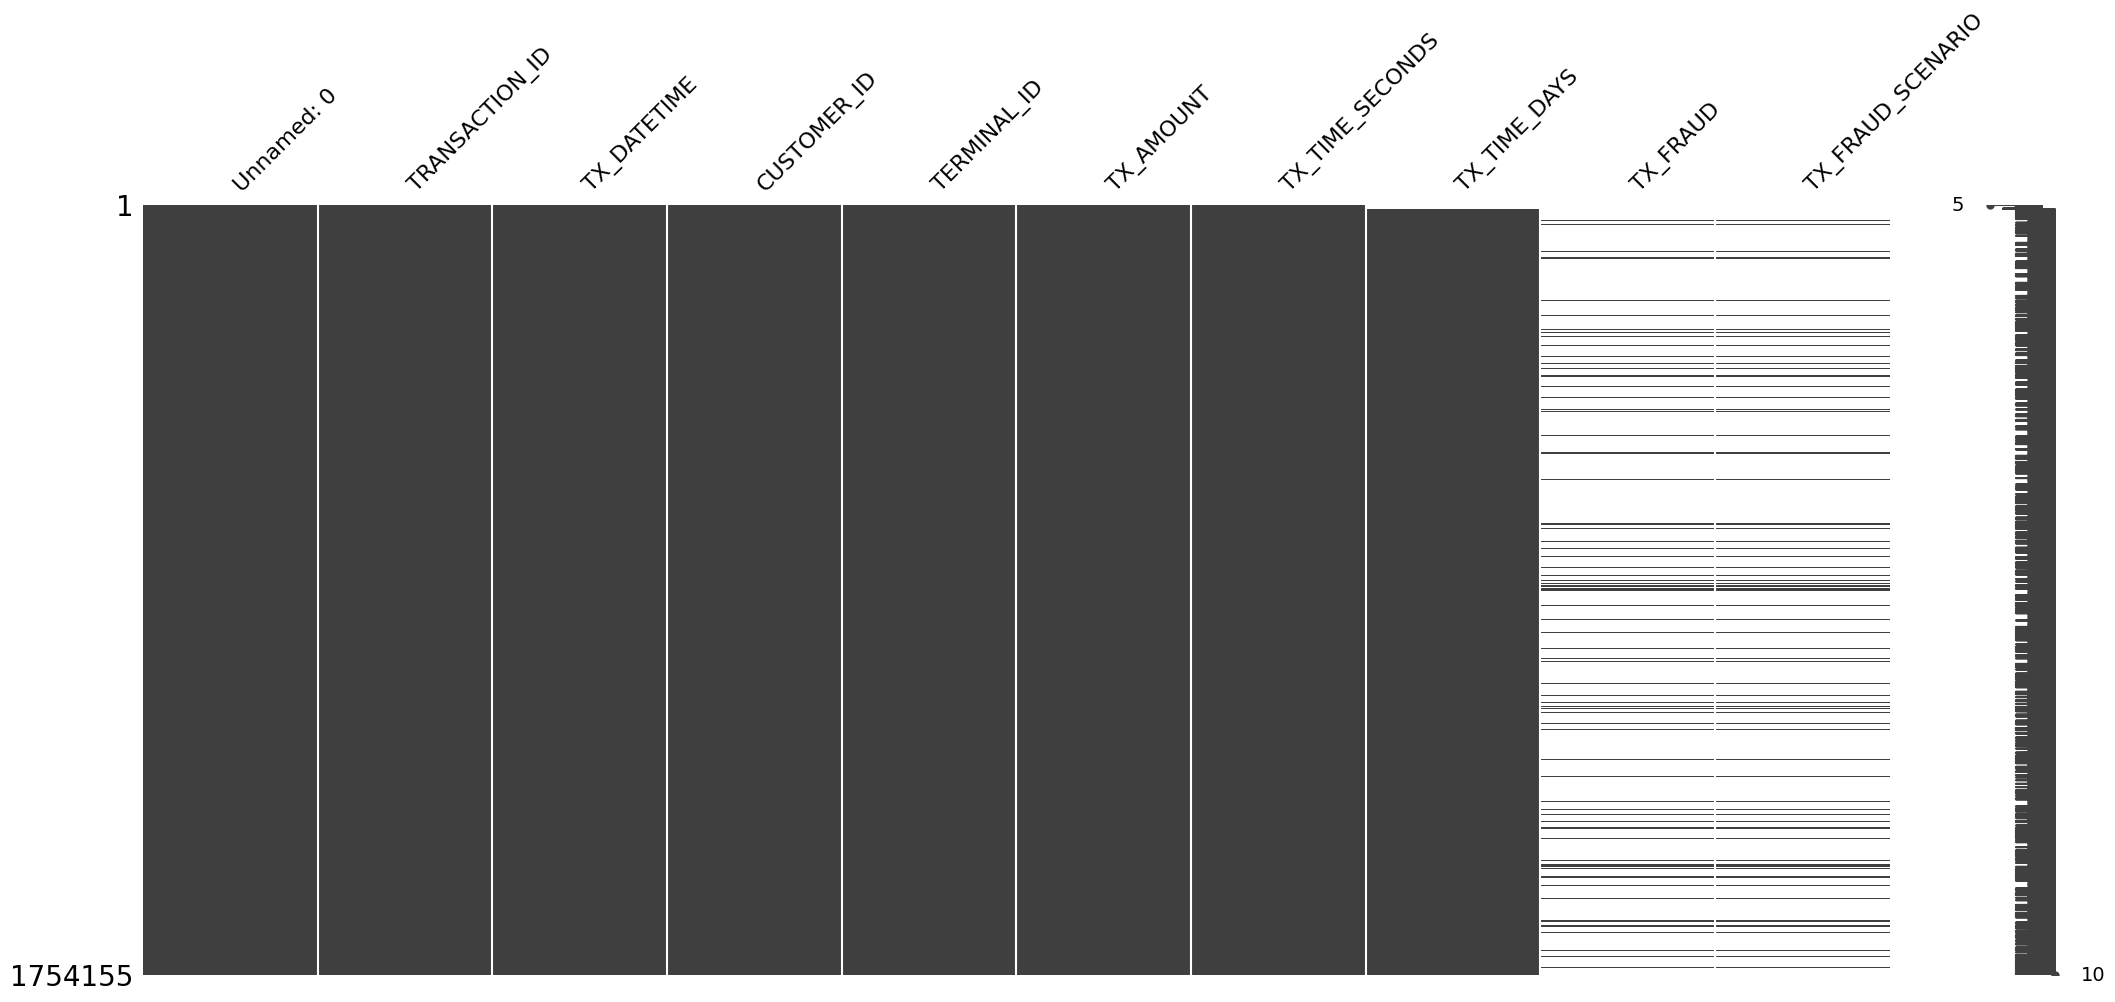

In [ ]:

payments_zeros = zero_values(payments) #dataset com zeros tidos como "NaN"
ms.matrix(payments_zeros)

Das colunas identificadas como contendo zeros, temos que:

1.   `CUSTOMER_ID:` as 384 linhas nulas podem identificar um cliente com ID zero, então não seria um problema.
2.   `TERMINAL_ID:` as 178 linhas nulas podem identificar um terminal com ID zero, então não seria um problema.
3.   `TX_TIME_DAYS:` as 94888 linhas nulas podem identificar transações que não demoraram nenhum dia inteiro para ocorrer, o que não seria um problema.
4.   `TX_FRAUD:` as 1518186 linhas nulas identificam que não há fraude nessas transações. O número alto faz sentido, considerando que é mais fácil termos transações não fraudulentas (as classes não são balanceadas)
5.   `FRAUD_SCENARIO:`as 1518186 linhas nulas são equivalentes ao tipo de transação não fraudulenta acima.
6.   `TX_AMOUNT:`há sete linhas nulas. Não temos informação se isso pode ter sido causado por erro de sistema, transações incompletas (com delay) ou se é sinal de algo anômalo, possivelmente fraude. Vamos entender quais rótulos foram dados para esses exemplos para decidir se é algo que deve ser retirado do dataset.



Vamos analisar as 7 tinhas cujo `TX_AMOUNT` é nulo:

In [ ]:
print(payments[payments['TX_AMOUNT'] == 0])

         Unnamed: 0  TRANSACTION_ID          TX_DATETIME  CUSTOMER_ID  \
373190       373190          373190  2023-02-08 18:15:02         3746   
973699       973699          973699  2023-04-12 12:13:35         4472   
1007292     1007292         1007292  2023-04-16 02:45:35          367   
1011940     1011940         1011940  2023-04-16 12:17:55         2046   
1238476     1238476         1238476  2023-05-10 07:12:40         1649   
1567624     1567624         1567624  2023-06-13 12:46:13         1774   
1749772     1749772         1749772  2023-07-02 12:46:45          894   

         TERMINAL_ID  TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS  TX_FRAUD  \
373190           566        0.0          3348902            38         0   
973699          8450        0.0          8770415           101         0   
1007292         4790        0.0          9081935           105         0   
1011940          603        0.0          9116275           105         0   
1238476         8029        0.0    

Note que nenhuma das transações foi tida como fraude, então possivelmente foi apenas um erro de sistema. Vamos retirar essas sete linhas do nosso dataset.

In [ ]:
payments_completo = payments.copy() #salvando cópia do dataset completo
payments = payments[payments['TX_AMOUNT'] != 0] #retirando as 7 linhas

In [ ]:
#verificando de funcionou
print(payments[payments['TX_AMOUNT'] == 0])

Empty DataFrame
Columns: [Unnamed: 0, TRANSACTION_ID, TX_DATETIME, CUSTOMER_ID, TERMINAL_ID, TX_AMOUNT, TX_TIME_SECONDS, TX_TIME_DAYS, TX_FRAUD, TX_FRAUD_SCENARIO]
Index: []


#####Domínio das variáveis

Já vimos que cada atributo tem o formato adequado de dados (tirando data e hora, que modificaremos posteriormente). Falta entender se existe algum valor que não faz sentido (tirado o zero, que já tratamos).


In [ ]:
min_max = payments.min(), payments.max() #criar tabela com máximos e mínimos

In [ ]:
min_max_table = pd.DataFrame(min_max, index = ['Mínimo', 'Máximo'])
print(min_max_table)

        Unnamed: 0  TRANSACTION_ID          TX_DATETIME  CUSTOMER_ID  \
Mínimo           0               0  2023-01-01 00:00:31            0   
Máximo     1754154         1754154  2023-07-02 23:59:57         4999   

        TERMINAL_ID  TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS  TX_FRAUD  \
Mínimo            0       0.01               31             0         0   
Máximo         9999  647837.50         15811197           182         1   

        TX_FRAUD_SCENARIO  
Mínimo                  0  
Máximo                  3  


Em termos de domínio de variáveis, não temos nenhum problema aparente. Note que o máximo de `TX_TIME_DAYS` e `TX_TIME_SECONDS` parece exagerado. Vamos avaliar em breve se o dado deve ser tratado como outlier ou como indicativo de fraude.

#####Possíveis Duplicatas

In [ ]:
possiveis_duplicatas(payments)

Coluna TX_DATETIME tem dados duplicados
Coluna CUSTOMER_ID tem dados duplicados
Coluna TERMINAL_ID tem dados duplicados
Coluna TX_AMOUNT tem dados duplicados
Coluna TX_TIME_SECONDS tem dados duplicados
Coluna TX_TIME_DAYS tem dados duplicados
Coluna TX_FRAUD tem dados duplicados
Coluna TX_FRAUD_SCENARIO tem dados duplicados
8 colunas com dados duplicados


Das colunas acima, nenhuma teria problema com dados duplicados, considerando que um mesmo cliente pode fazer mais de uma transação em terminais semelhantes, por exemplo. Além disso, transações podem ser feitas em dias e horários iguais por clientes diferentes.

#####Verificar possíveis Outliers

Vamos analisar o boxplot de cada um dos atributos para ver se encontramos valores muito fora do esperado:

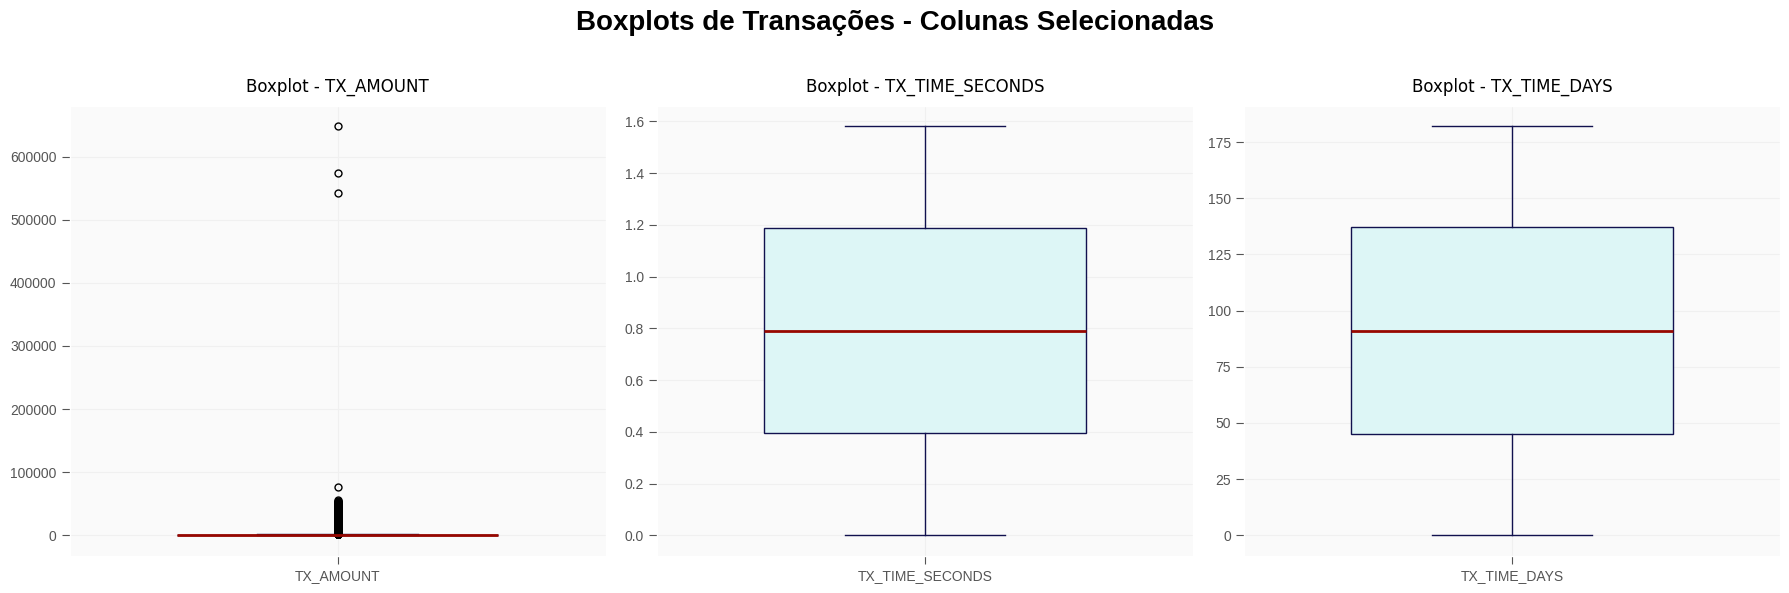

In [ ]:


# Carrega folha de estilo
plt.style.use("ggplot")

# Modifica mais alguns parâmetros
plt.rc("axes", facecolor="#fafafa", grid=True)  # Cor do fundo
plt.rc("grid", color="#f0f0f0")  # Cor do quadriculado

# Preparar a figura com 1 linha e 3 colunas para 3 subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Definindo as colunas a serem excluídas
colunas_adicionadas = ['TX_AMOUNT','TX_TIME_SECONDS','TX_TIME_DAYS']

# Listar as colunas para gerar os gráficos (excluindo as colunas indesejadas)
columns = [col for col in payments.columns if col in colunas_adicionadas]

# Gerar o boxplot para cada uma das 3 primeiras colunas restantes
for i, coluna in enumerate(columns[:3]):  # Limita a 3 colunas
    ax = axes[i]  # Definir o eixo correto para cada subplot
    payments.boxplot(
        column=coluna,
        ax=ax,
        widths=0.6,
        patch_artist=True,  # Permite colorir as caixas
        boxprops=dict(facecolor='#DDF6F6', color='#11114E'),  # Cor das caixas e do contorno
        whiskerprops=dict(color='#11114E'),  # Cor dos bigodes
        capprops=dict(color='#11114E'),  # Cor das "tampas" dos bigodes
        flierprops=dict(marker='o', markersize=5),  # Cor dos outliers
        medianprops=dict(color='#970700', linewidth=2)  # Cor da linha da mediana
    )

    # Definir título para cada subgráfico
    ax.set_title(f'Boxplot - {coluna}', fontsize=12, loc='center', pad=10)

    # Personalizar os ticks
    ax.tick_params(axis='both', labelsize=10, length=6)

    # Definir fonte para os ticks
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, fontname='Liberation Sans')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, fontname='Liberation Sans')

# Adicionar título geral acima dos subgráficos
fig.suptitle('Boxplots de Transações - Colunas Selecionadas', fontsize=20, fontweight='bold', fontname='Liberation Sans')

# Ajustar o layout para que não sobreponha os gráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o layout para dar espaço para o título

# Mostrar o gráfico
plt.show()


Na coluna `TX_AMOUNT`temos alguns valores muito altos em comparação com a maioria das transações.
Não temos um super problema nessa parte, considerando que transações de baixo valor são bem mais comuns e frequentes que transações de valores muito altos.

Vamos fazer uma pequena análise de do tipo de transação de cada linha que tem o `TX_AMOUNT` considerado outlier:

Valores dos outliers: [1714.22 1746.18 1653.37 ... 2657.75 1655.14 1619.43]

Linhas com outliers identificadas como fraude
27798

Linhas com outliers que foram considerados fraude com valor acima de R$10.000,00
2347

Linhas com outliers com valor acima de R$10.000,00
2347
         Unnamed: 0  TRANSACTION_ID          TX_DATETIME  CUSTOMER_ID  \
18260         18260           18260  2023-01-02 19:09:25         3833   
23511         23511           23511  2023-01-03 11:18:44         1918   
30200         30200           30200  2023-01-04 06:23:24         1918   
30439         30439           30439  2023-01-04 06:54:22         4556   
36625         36625           36625  2023-01-04 16:48:10         3833   
...             ...             ...                  ...          ...   
1750861     1750861         1750861  2023-07-02 14:19:26         3280   
1751380     1751380         1751380  2023-07-02 15:05:02         3516   
1752248     1752248         1752248  2023-07-02 16:36:25         1771 

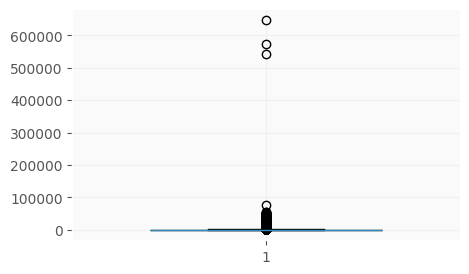

In [ ]:
# Gerar novamente o boxplot
fig, ax = plt.subplots(figsize=(5, 3))
box = ax.boxplot(payments['TX_AMOUNT'], widths=0.6, patch_artist=True)

# Obter os outliers
outliers = box['fliers'][0].get_data()[1]  # Dados dos outliers estão no segundo elemento da lista

# Exibir os valores dos outliers
print("Valores dos outliers:", outliers)
print()

# Encontrar as linhas correspondentes aos outliers no DataFrame e com TX_FRAUD == 1
outliers_fraud = payments[(payments['TX_AMOUNT'].isin(outliers)) & (payments['TX_FRAUD'] == 1)]
outliers_fraud2 = payments[(payments['TX_AMOUNT'] > 10000) & (payments['TX_FRAUD'] == 1)]
outliers_10k = payments[(payments['TX_AMOUNT'] > 10000)]

# Exibir as linhas dos outliers com fraude
print("Linhas com outliers identificadas como fraude")
print(len(outliers_fraud))
print()
print("Linhas com outliers que foram considerados fraude com valor acima de R$10.000,00")
print(len(outliers_fraud2))
print()
print("Linhas com outliers com valor acima de R$10.000,00")
print(len(outliers_10k))

print(outliers_fraud2)


Como os valores tidos como outlier são indicados como fraudes, que são o nosso objeto de estudo, manteremos os dados inalterados.

##4 | Análise exploratória de dados
------------

O objetivo desse capítulo é entender melhor como os dados são distribuídos, qual a melhor maneira de atacar o problema em questão e maneiras de melhorar os atributos de forma que nosso processo de Machine Learning seja o mais efetivo possível.

In [ ]:
payments.describe()

,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
count,1.754148e+06,1.754148e+06,1.754148e+06,1.754148e+06,1.754148e+06,1.754148e+06,1.754148e+06,1.754148e+06,1.754148e+06
mean,8.770760e+05,8.770760e+05,2.504013e+03,4.996737e+03,5.396842e+02,7.903225e+06,9.097250e+01,1.345206e-01,1.449752e-01
std,5.063811e+05,5.063811e+05,1.445987e+03,2.886099e+03,1.179712e+03,4.565173e+06,5.283710e+01,3.412109e-01,3.874879e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.385378e+05,4.385378e+05,1.252000e+03,2.502000e+03,1.799500e+02,3.940844e+06,4.500000e+01,0.000000e+00,0.000000e+00
50%,8.770745e+05,8.770745e+05,2.506000e+03,4.994000e+03,4.217600e+02,7.902651e+06,9.100000e+01,0.000000e+00,0.000000e+00
75%,1.315615e+06,1.315615e+06,3.765000e+03,7.495000e+03,7.506000e+02,1.186566e+07,1.370000e+02,0.000000e+00,0.000000e+00
max,1.754154e+06,1.754154e+06,4.999000e+03,9.999000e+03,6.478375e+05,1.581120e+07,1.820000e+02,1.000000e+00,3.000000e+00


### 4.1 Distribuição dos dados

Vamos analisar a distribuição dos dados para entender sobre balanceamento e outras informações que podem ser inferidas dessa informação. Antes de tudo, vamos converter a coluna `TX_DATETIME` para algo que possa ser analisado de forma numérica. Para isso, vamos criar duas notas colunas: `TX_DATE` e `TX_TIME`. O formado da coluna TX_DATETIME segue sempre o seguinte padrão: `YYYY-MM-DD 00:HH:MM`, uma string de 19 caracteres.



In [ ]:
payments.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


Vou confessar que estava preparada para fazer essa divisão na mão e descobri que tem uma maneira que facilita tudo para a gente, ou seja, converte a coluna em questão para um formado `DATATIME`, que pode ser manipulado de maneira mais fácil. Dessa forma conseguimos facilmente criar três novas colunas:

*   HOUR: que está no formato militar (0 a 23).
*   DAY_OF_WEEK: que varia de 0 (domingo) a 6 (sábado).
*   MONTH: que varia de 1 a 7 (apenas esses meses foram considerados na análise).


In [ ]:
payments['TX_DATETIME'] = pd.to_datetime(payments['TX_DATETIME'])

In [ ]:
payments['HOUR'] = payments['TX_DATETIME'].dt.hour
payments['DAY_OF_WEEK'] = payments['TX_DATETIME'].dt.dayofweek
payments['MONTH'] = payments['TX_DATETIME'].dt.month

In [ ]:
payments['MONTH'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [ ]:
payments['DAY_OF_WEEK'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int32)

In [ ]:
payments['HOUR'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

Considere os gráficos a seguir:

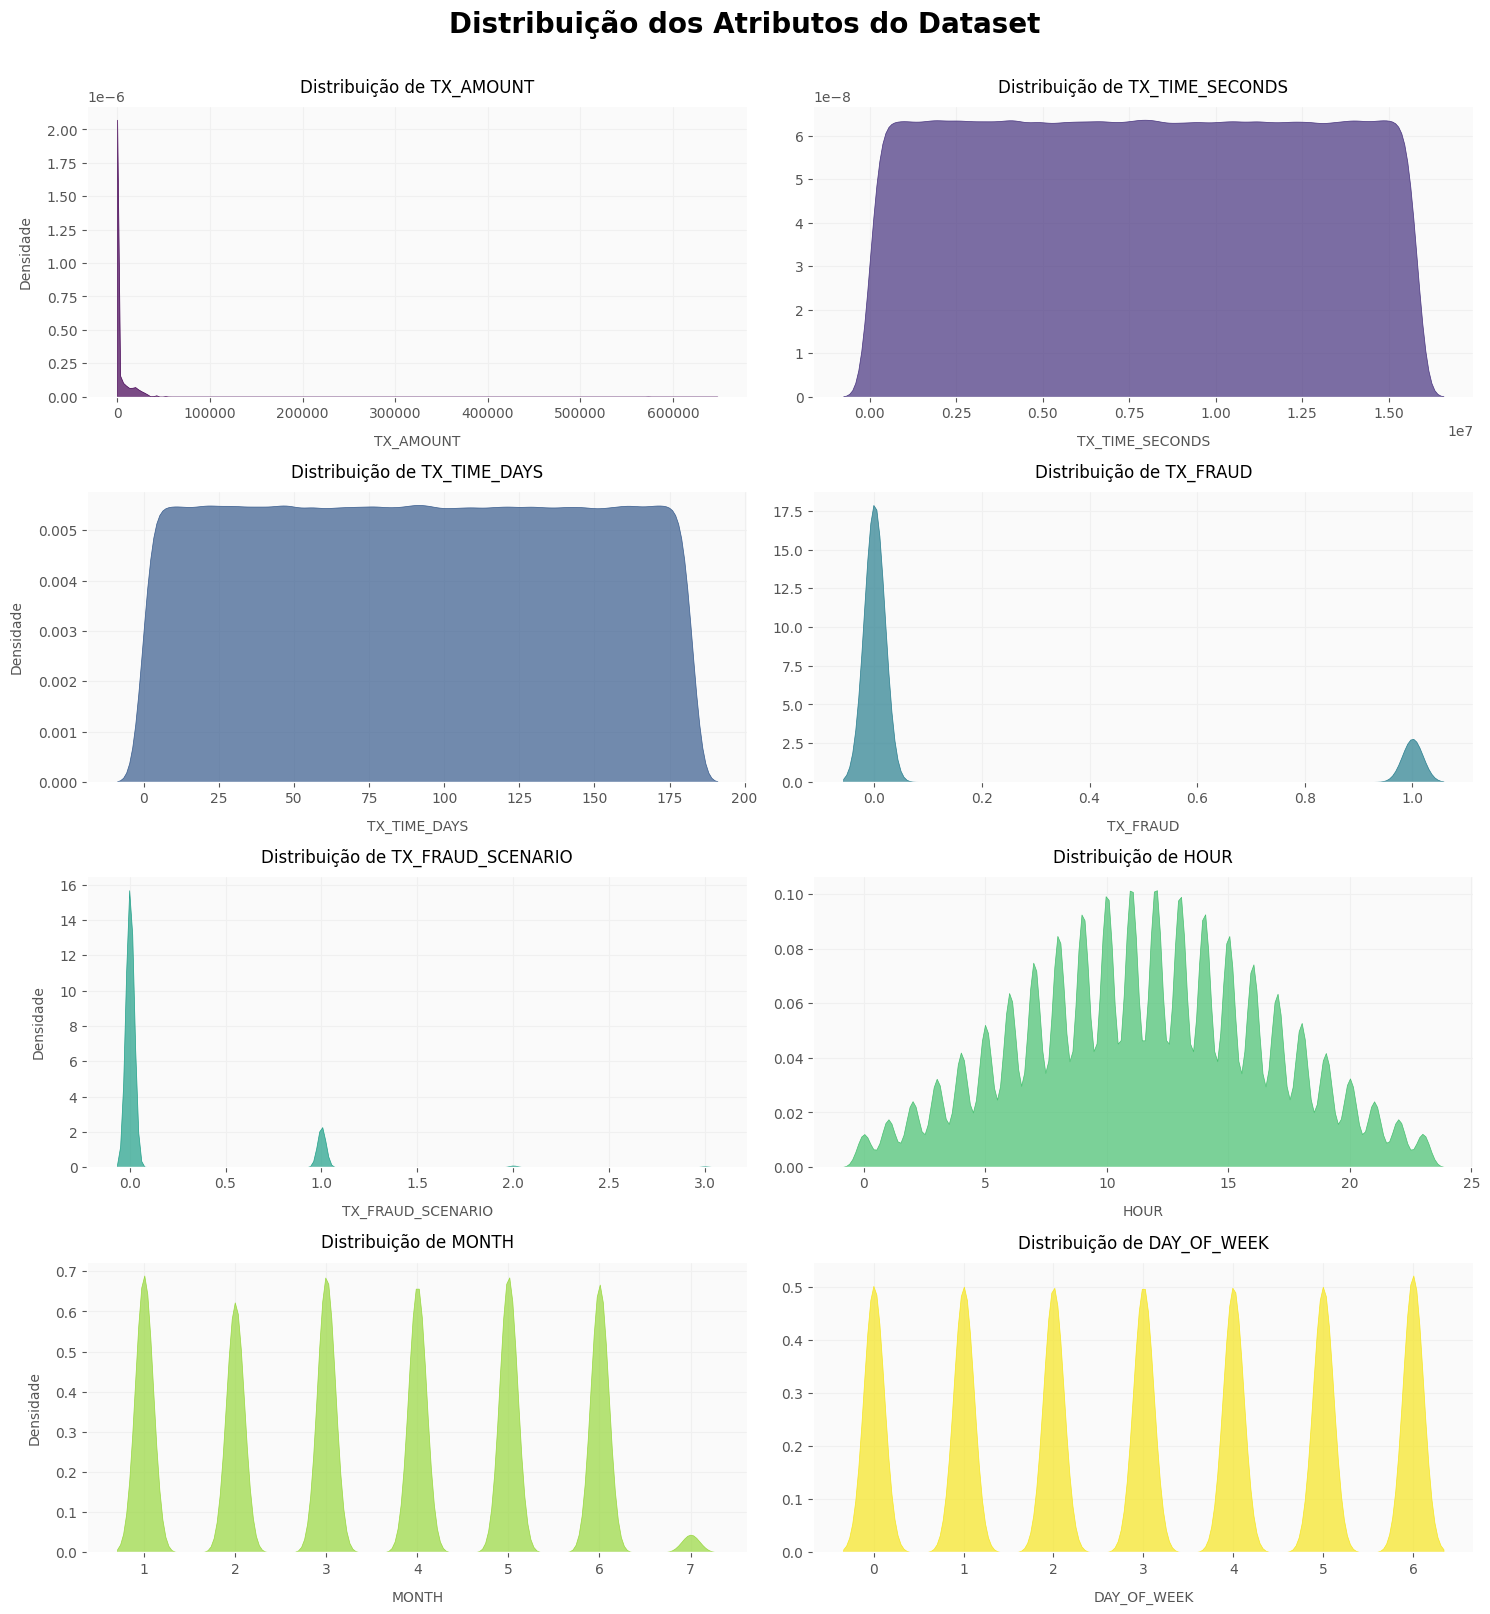

In [ ]:

# Carrega folha de estilo
plt.style.use("ggplot")

# Modifica mais alguns parâmetros
plt.rc("axes", facecolor="#fafafa", grid=True)  # Cor do fundo
plt.rc("grid", color="#f0f0f0")  # Cor do quadriculado

fig, axes = plt.subplots(4, 2, figsize=(15, 16))  # 4 linhas e 2 colunas de gráficos

# Ajustando o espaço entre os subgráficos
plt.subplots_adjust(hspace=0.6, wspace=0.8)

# Atributos a serem plotados
atributos = ['TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD', 'TX_FRAUD_SCENARIO', 'HOUR', 'MONTH', 'DAY_OF_WEEK']

# Paleta de cores Viridis
colors = plt.cm.viridis(range(0, 256, 36))

# Gerar os gráficos de densidade para cada atributo
for i, atributo in enumerate(atributos):
    ax = axes[i // 2, i % 2]  # Determinando a posição do gráfico (linha, coluna)

    # Usando sns.kdeplot para gráficos de densidade
    sns.kdeplot(data=payments, x=atributo, fill=True, color=colors[i % len(colors)], alpha=0.7, ax=ax)

    # Customizando o gráfico
    ax.set_title(f'Distribuição de {atributo}', fontsize=12, pad=10)
    ax.set_xlabel(atributo, fontsize=10, labelpad=10)

    # Adicionando "Densidade" apenas nos gráficos da esquerda (coluna 0)
    if i % 2 == 0:
        ax.set_ylabel('Densidade', fontsize=10, labelpad=10)
    else:
        ax.set_ylabel('')

# Adicionando o título geral acima de todos os gráficos
fig.suptitle('Distribuição dos Atributos do Dataset', fontsize=20, fontweight='bold', y=1.006)

# Ajustando o layout
fig.tight_layout()
plt.tight_layout()

# Mostrar o gráfico
plt.show()


*   `TX_AMOUNT`: como já tínhamos notado anteriormente, a grande maioria das transações está em valores baixos.
*   `TX_TIME_SECONDS` e `TX_TIME_HOURS`:  são totalmente correlacionadas, mudando-se apenas as escalas, logo faz sentido que elas tenham a mesma distribuição.  

*   `TX_FRAUD`: essa é uma variável que binária que tem a maioria dos valores "0", ou seja, operações não fraudulentas. Dito isso, temos um problema bem desbalanceado e é preciso resolver tais aspectos para que o modelo de Machine Learning não dê peso demasiado aos valores que são assumidos com muito mais frequência.

*   `TX_FRAUD_SCENARIO`: Naturalmente temos mais valores "0", pois é o cenário que indica transações não fraudulentos. Além disso, quando considerando o universos das fraudes, temos duas opções: 1 e 2, sendo a opção 2 mais comum que a opção 3, indicando outro nível de desbalanceamento (que será um problema caso a gente decida utilizar essa informação no nosso modelo).  

*   `HOUR`: Observamos um pico de transações no horário comercial, porém a distribuição parece ser uma soma de normais. Para checar isso, vamos fazer o teste AIC e BIC.

*   `DAY_OF_WEEK` e `MONTH` : Observamos que as transações ocorreram em quantidade semelhante em todos os dias de semana e meses (possivelmente o mês 7 é o mês de férias, com menos transações, ou o mês em que temos menos dados (coleta de dados pode ter sido feita só até o meio do mês, por exemplo)


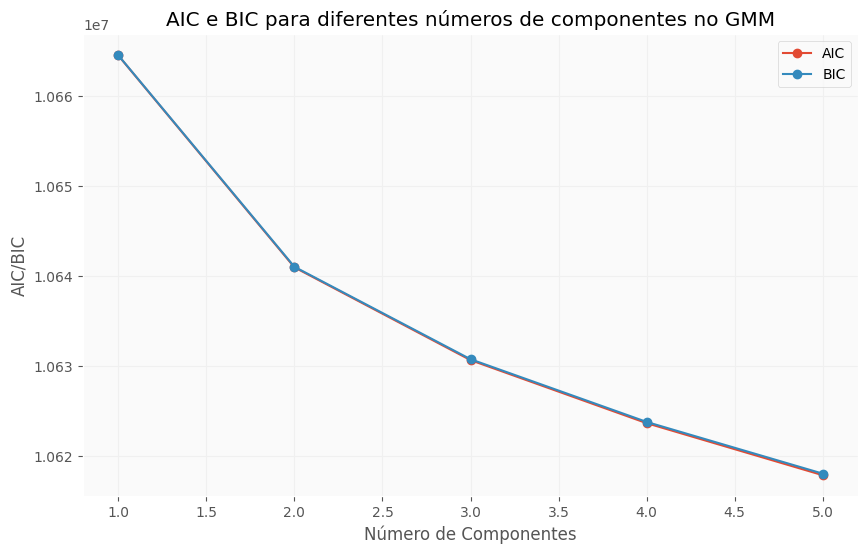

Número ideal de componentes: 5


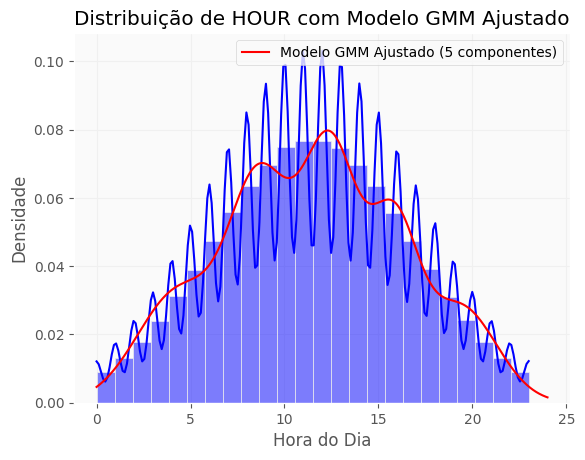

In [ ]:
from sklearn.mixture import GaussianMixture


X = payments['HOUR'].values.reshape(-1, 1)

components_range = range(1, 6)  # Testar de 1 a 5 componentes

# Lista para armazenar os AIC e BIC para cada modelo
aic_values = []
bic_values = []

# Ajustar o modelo de mistura gaussiana com diferentes componentes
for n_components in components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X)
    aic_values.append(gmm.aic(X))
    bic_values.append(gmm.bic(X))

# Plotar os valores de AIC e BIC para escolher o número de componentes
plt.figure(figsize=(10, 6))
plt.plot(components_range, aic_values, label="AIC", marker='o')
plt.plot(components_range, bic_values, label="BIC", marker='o')
plt.title('AIC e BIC para diferentes números de componentes no GMM')
plt.xlabel('Número de Componentes')
plt.ylabel('AIC/BIC')
plt.legend()
plt.show()

# Escolher o número de componentes com o menor AIC/BIC
best_n_components = components_range[np.argmin(aic_values)]
print(f'Número ideal de componentes: {best_n_components}')

# Ajustar o GMM com o melhor número de componentes
gmm = GaussianMixture(n_components=best_n_components)
gmm.fit(X)

# Gerar valores ajustados para o modelo
x = np.linspace(0, 24, 1000).reshape(-1, 1)
log_prob = gmm.score_samples(x)

# Plotar o histograma e a distribuição ajustada
sns.histplot(payments['HOUR'], kde=True, color='blue', stat='density', bins=24)
plt.plot(x, np.exp(log_prob), color='red', label=f'Modelo GMM Ajustado ({best_n_components} componentes)')
plt.title('Distribuição de HOUR com Modelo GMM Ajustado')
plt.xlabel('Hora do Dia')
plt.ylabel('Densidade')
plt.legend()
plt.show()


###4.2 Correlação

Vamos analisar agora a correlação tanto das variáveis ditas potencialmente explicativas como da variável target `TX_FRAUD`, nosso objeto de interesse. Além disso, pode fazer sentido analisar a correlação entre elas um a um para nos ajudar a ter uma noção melhor do comportamente e avaliar possíveis métodos de feature selection.

####Balanceamento Variável Target

Vamos analisar o nível de desbalanceamento de classes:

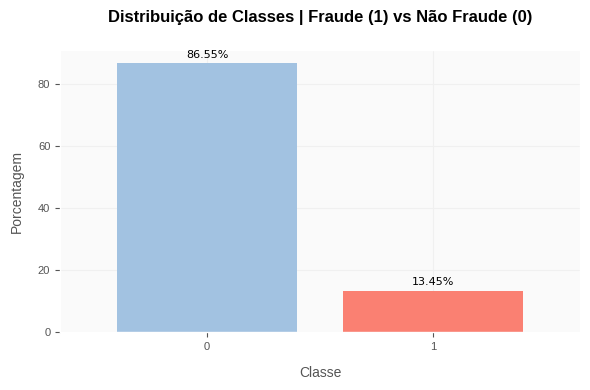

In [ ]:
# Verificando a distribuição das classes
fraud_count = payments['TX_FRAUD'].value_counts()

# Carrega folha de estilo
plt.style.use("ggplot")

# Modifica mais alguns parâmetros
plt.rc("axes", facecolor="#fafafa", grid=True)  # Cor do fundo
plt.rc("grid", color="#f0f0f0")  # Cor do quadriculado

fraud_count = payments['TX_FRAUD'].value_counts(normalize=True) * 100

# Plotando o gráfico
plt.figure(figsize=(6, 4))
ax = fraud_count.plot(kind='bar', color=['#A2C2E1', 'salmon'], width=0.8)

plt.title('Distribuição de Classes | Fraude (1) vs Não Fraude (0)', fontsize=12, fontname='Liberation Sans', fontweight='bold', pad=20)
plt.xlabel('Classe', fontsize=10, labelpad=10, fontname='Liberation Sans')
plt.ylabel('Porcentagem', fontsize=10, labelpad=10, fontname='Liberation Sans')
plt.xticks(rotation=0, fontsize=12)

# Adicionando a porcentagem em cima das barras
for i, v in enumerate(fraud_count):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=8)

#fonte
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, fontname='Liberation Sans')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8, fontname='Liberation Sans')

plt.tight_layout()
plt.show()

Note que temos um severo desbalanceaomento de classes, algo que faz sentido no contexto, considerando que, em geral, temos muito mais transações não-fraudulentas que o contrário. Além disso, pelo gráfico abaixo podemos notar que temos três tipos de cenários dentro das transações fraudulentas (1, 2 e 3).

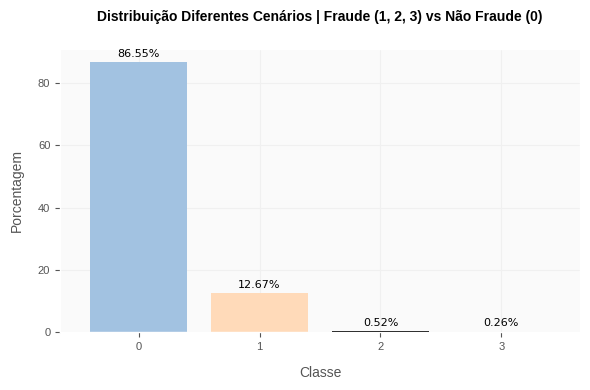

In [ ]:
# Verificando a distribuição das classes
fraud_count = payments['TX_FRAUD'].value_counts()

# Carrega folha de estilo
plt.style.use("ggplot")

# Modifica mais alguns parâmetros
plt.rc("axes", facecolor="#fafafa", grid=True)  # Cor do fundo
plt.rc("grid", color="#f0f0f0")  # Cor do quadriculado

fraud_count = payments['TX_FRAUD_SCENARIO'].value_counts(normalize=True) * 100

# Plotando o gráfico
plt.figure(figsize=(6, 4))
ax = fraud_count.plot(kind='bar', color=['#A2C2E1', '#FFDAB9', 'black'], width=0.8)

plt.title('Distribuição Diferentes Cenários | Fraude (1, 2, 3) vs Não Fraude (0)', fontsize=10, fontname='Liberation Sans', fontweight='bold', pad=20)
plt.xlabel('Classe', fontsize=10, labelpad=10, fontname='Liberation Sans')
plt.ylabel('Porcentagem', fontsize=10, labelpad=10, fontname='Liberation Sans')
plt.xticks(rotation=0, fontsize=12)

# Adicionando a porcentagem em cima das barras
for i, v in enumerate(fraud_count):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=8)

#fonte
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, fontname='Liberation Sans')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8, fontname='Liberation Sans')

plt.tight_layout()
plt.show()

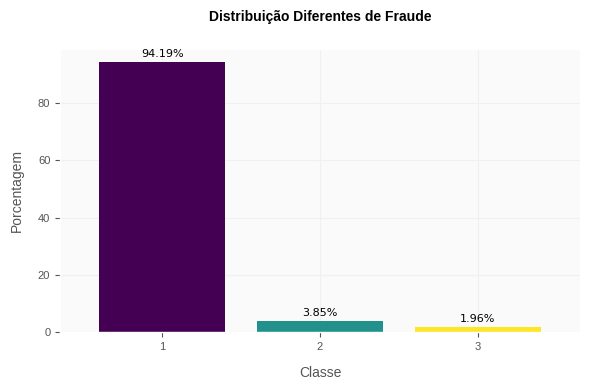

In [ ]:

# Filtrando os dados para dropar o cenário 0
payments_filtered = payments[payments['TX_FRAUD_SCENARIO'] != 0]

# Verificando a distribuição das classes sem o cenário 0
fraud_count = payments_filtered['TX_FRAUD_SCENARIO'].value_counts(normalize=True) * 100

# Carrega folha de estilo
plt.style.use("ggplot")

# Modifica mais alguns parâmetros
plt.rc("axes", facecolor="#fafafa", grid=True)  # Cor do fundo
plt.rc("grid", color="#f0f0f0")  # Cor do quadriculado

# Usando a paleta viridis
colors = plt.cm.viridis(np.linspace(0, 1, len(fraud_count)))

# Plotando o gráfico
plt.figure(figsize=(6, 4))
ax = fraud_count.plot(kind='bar', color=colors, width=0.8)

plt.title('Distribuição Diferentes de Fraude', fontsize=10, fontname='Liberation Sans', fontweight='bold', pad=20)
plt.xlabel('Classe', fontsize=10, labelpad=10, fontname='Liberation Sans')
plt.ylabel('Porcentagem', fontsize=10, labelpad=10, fontname='Liberation Sans')
plt.xticks(rotation=0, fontsize=12)

# Adicionando a porcentagem em cima das barras
for i, v in enumerate(fraud_count):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=8)

# Fonte
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, fontname='Liberation Sans')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8, fontname='Liberation Sans')

plt.tight_layout()
plt.show()


####Horários mais fraudulentos

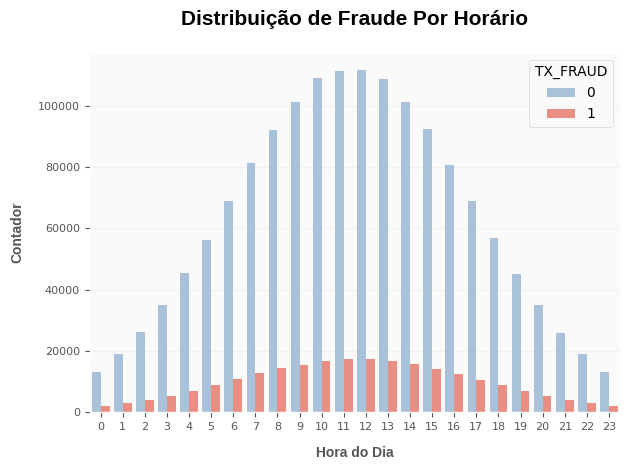

In [ ]:


# Carrega folha de estilo
plt.style.use("ggplot")

# Modifica mais alguns parâmetros
plt.rc("axes", facecolor="#fafafa", grid=True)  # Cor do fundo
plt.rc("grid", color="#f0f0f0")  # Cor do quadriculado

# Usando o azul pastel mais escuro e salmon
sns.countplot(x='HOUR', hue='TX_FRAUD', data=payments, palette=['#A2C2E1', 'salmon'])
plt.title("Distribuição de Fraude Por Horário", fontsize=15, fontname='Liberation Sans', fontweight='bold', pad=20)

# Obter o eixo atual
ax = plt.gca()

# Modificar o título do eixo X
ax.set_xlabel('Hora do Dia', fontsize=10, fontname='Liberation Sans', fontweight='bold', labelpad=10)
ax.set_ylabel('Contador', fontsize=10, fontname='Liberation Sans', fontweight='bold', labelpad=10)

# Modificando o tamanho dos números (ticks) nos eixos
ax.tick_params(axis='x', labelsize=8)  # Tamanho dos números do eixo x
ax.tick_params(axis='y', labelsize=8)  # Tamanho dos números do eixo y

plt.tight_layout()
plt.show()





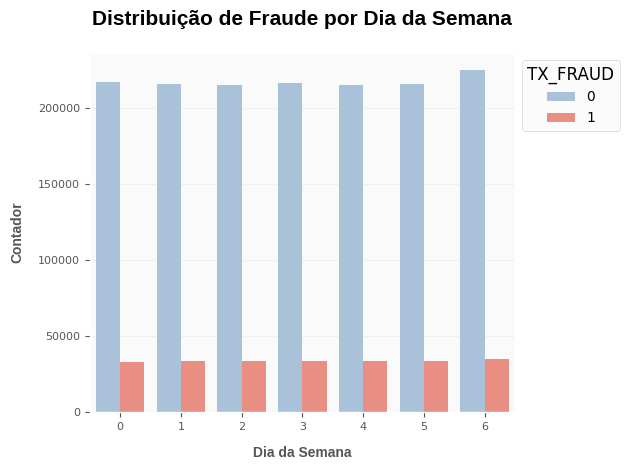

In [ ]:


# Carrega folha de estilo
plt.style.use("ggplot")

# Modifica mais alguns parâmetros
plt.rc("axes", facecolor="#fafafa", grid=True)  # Cor do fundo
plt.rc("grid", color="#f0f0f0")  # Cor do quadriculado



# Plot fraud distribution by day of week com o mesmo esquema de cores
sns.countplot(x='DAY_OF_WEEK', hue='TX_FRAUD', data=payments, palette=['#A2C2E1', 'salmon'])
plt.title("Distribuição de Fraude por Dia da Semana", fontsize=15, fontname='Liberation Sans', fontweight='bold', pad=20)

# Obter o eixo atual
ax = plt.gca()

# Modificar o título do eixo X
ax.set_xlabel('Dia da Semana', fontsize=10, fontname='Liberation Sans', fontweight='bold', labelpad=10)
ax.set_ylabel('Contador', fontsize=10, fontname='Liberation Sans', fontweight='bold', labelpad=10)

# Modificando o tamanho dos números (ticks) nos eixos
ax.tick_params(axis='x', labelsize=8)  # Tamanho dos números do eixo x
ax.tick_params(axis='y', labelsize=8)  # Tamanho dos números do eixo y

plt.legend(title='TX_FRAUD', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, title_fontsize=12)

plt.tight_layout()
plt.show()


Analisando os gráficos assima podemos notar que as transações fraudulentas são visivelmente menos frequentes que as transações menos fraudulentas (como já tínhamos notado em análises anteriores).

Além disso, a maior concentração de **transações não fraudulentas** está em horário comercial, como é de se esperar. Já sobre as *transações fraudulentas*, temos que elas são mais uniformes ao longo do dia (em comparação às não fraudulentas), mas ainda há um aumento na quantidade no horário comercial (bem menos acentuado).

####Correlação entre variáveis

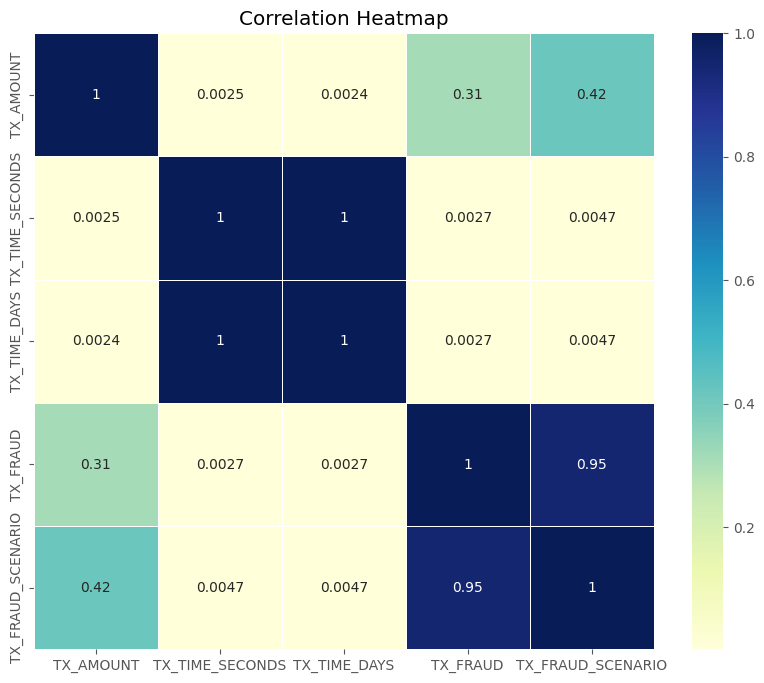

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(payments[['TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD', 'TX_FRAUD_SCENARIO']].corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Note que `TX_TIME_DAYS` e `TX_TIME_SECONDS` tem uma correlação perfeita, visto que representam os mesmos dados em escalas distintas (ou seja, há redundância na informação). Já `TX_AMOUNT` e `TX_FRAUD` tem correlação de $0,31$, que é considerada fraca/moderada, ou seja, existe uma leve tendência das transações mais altas serem associadas à fraudes. Agora, `TX_TIME_SECONDS`, `TX_TIME_DAYS` e `TX_FRAUD` tem correlações muito pequenas, de $0,0027$, ou seja, não há relação significativa, o que sugere que tempo em que a transação ocorre não parece influenciar de forma direta a ocorrência de fraude. Por último, `TX_FRAUD_SCENARIO` e `TX_FRAUD` também são extremamente correlacionadas, o que é de se esperar visto que a única diferença entre elas são os (poucos) cenários de fraude que são divididos em duas categorias.



##5 | Definição do target, variáveis e divisão dos dados
------------

###5.1 Feature Selection

In [ ]:
payments.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,HOUR,DAY_OF_WEEK,MONTH
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0,0,6,1
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0,0,6,1
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1,0,6,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0,0,6,1
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0,0,6,1


In [ ]:
#Dividindo em X e y (target)
X = payments.drop(['TX_FRAUD', 'TX_FRAUD_SCENARIO', 'TX_DATETIME', 'Unnamed: 0','TRANSACTION_ID', 'TX_TIME_DAYS' ], axis=1)
y = payments['TX_FRAUD']

Note que além da nossa variável target, que seria a variável binária `TX_FRAUD`, retiramos das variáveis possivelmente explicativas `TX_FRAUD_SCENARIO`, que é uma variável muito correlacionada com a target, o que pode gerar **data leakeage**. `TX_DATETIME` é uma variável que já foi transformada, `Unnamed: 0`,`TRANSACTION_ID` são chaves organizacionais e `TX_TIME_DAYS` já verificamos anteriormente ser redundante.

In [ ]:
X.head()

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,HOUR,DAY_OF_WEEK,MONTH
0,596,3156,533.07,31,0,6,1
1,4961,3412,808.56,130,0,6,1
2,2,1365,1442.94,476,0,6,1
3,4128,8737,620.65,569,0,6,1
4,927,9906,490.66,634,0,6,1


In [ ]:
y.head()

,TX_FRAUD
0,0
1,0
2,1
3,0
4,0


Apesar de já termos uma ideia das melhores variáveis explicativas (considerando a análise de dados feita na seção anterior), vamos usar **SelectKBest** para reduzir a dimensionalidade (excluindo features redundantes ou irrelevantes). Como nosso dataset não tem muitas colunas, vamos escolher $k=4$:

In [ ]:
#Seleção univariada selectKbest

best_var = SelectKBest(score_func=f_classif, k=4) #TESTE ANOVA f CATEG y e numerico X

#executa a função de pontuação em (X,y) e obtém os atributos selecionados
fit = best_var.fit(X,y)

#reduz x para os atributos selecionados
features = fit.transform(X)

#Resultados:
print('\nNúmero original de atributos', X.shape[1])
print('\nNúmero reduzido de atributos', features.shape[1])

# Exibe os atributos orginais
print('\nAtributos originais', X.columns)

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
print('\nScores dos Atributos Originais:', fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=X.columns[0:13]))


Número original de atributos 7

Número reduzido de atributos 4

Atributos originais Index(['CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'HOUR',
       'DAY_OF_WEEK', 'MONTH'],
      dtype='object')

Scores dos Atributos Originais: [3.32306980e+01 8.18931607e+00 1.91092562e+05 1.23260438e+01
 5.26817355e-03 9.03732048e-01 1.09697296e+01]

Atributos Selecionados: ['CUSTOMER_ID' 'TX_AMOUNT' 'TX_TIME_SECONDS' 'MONTH']


Além do método **selectKbest**, podemos testar outras maneiras de selecionar variáveis: usando **Regressão Logística** ou **ExtraTrees** (em que não precisamos definir a quantidade de atributos):

In [ ]:
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

#eliminação recursiva de atributos (algoritmo de classificação regressao logística)

modelo = LogisticRegression(max_iter = 1000)

#Eliminação recursiva de atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", X.columns)


# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=X.columns))

Atributos Originais: Index(['CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'HOUR',
       'DAY_OF_WEEK', 'MONTH'],
      dtype='object')

Atributos Selecionados: [False False  True False  True  True  True]

Ranking de atributos: [3 2 1 4 1 1 1]

Qtd de melhores Atributos: 4

Nomes dos Atributos Selecionados: ['TX_AMOUNT' 'HOUR' 'DAY_OF_WEEK' 'MONTH']


Considerando os dois métodos de Feature Selection testados, concluímos que:

*    **SelectKBest**: Normalmente é utilizado quando se tem muitas variáveis, pois a seleção é mais rápida. Porém esse método é univariado, ou seja, não considera a relação entre as variáveis de X.

*    **Regressão Logística**: Esse método considera as interações entre as variáveis.

Resultado de cada método:

SelectKBest: atributos selecionados:
*       ['CUSTOMER_ID' 'TX_AMOUNT' 'TX_TIME_SECONDS' 'MONTH']

Regressão Logística: atributos selecionados:
*       ['TX_AMOUNT' 'HOUR' 'DAY_OF_WEEK' 'MONTH']

Para o nosso problema, como as integrações entre as variáveis pode ser importante, bem provável que a gente siga com o segundo método de escolha de variáveis. Porém, vamos fazer uma pequena comparação para confirmar essa escolha:

In [ ]:
# Divisão entre treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Seleção de características com SelectKBest
selector = SelectKBest(score_func=f_classif, k=4)  # Selecionando as 4 melhores features
X_selected = selector.fit_transform(X_train, Y_train)

# Treinando o modelo com as features selecionadas
model = LogisticRegression(max_iter=1000)
model.fit(X_selected, Y_train)

# Predições
y_pred = model.predict(selector.transform(X_test))

# Avaliação de desempenho
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print("Seleção com SelectKBest:")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Seleção com SelectKBest:
Precisão: 0.597758405977584
Recall: 0.6123099819283512
F1-score: 0.6049466995746469


In [ ]:
# Treinando o modelo de regressão logística diretamente em todas as features
model_full = LogisticRegression(max_iter=1000)
model_full.fit(X_train, Y_train)

# Predições
y_pred_full = model_full.predict(X_test)

# Avaliação de desempenho
precision_full = precision_score(Y_test, y_pred_full)
recall_full = recall_score(Y_test, y_pred_full)
f1_full = f1_score(Y_test, y_pred_full)

print("\nRegressão Logística sem SelectKBest:")
print(f"Precisão: {precision_full}")
print(f"Recall: {recall_full}")
print(f"F1-score: {f1_full}")



Regressão Logística sem SelectKBest:
Precisão: 0.6902805632830864
Recall: 0.6805357712341873
F1-score: 0.6853735306083121


Para o nosso problema (que envolve detecção de fraudes usando classificação binária), temos o seguinte contexto:

*   TP (True Positive): Fraudes corretamente identificadas.
*   FP (False Positive): Transações legítimas incorretamente classificadas como fraude.
*   FN (False Negative): Fraudes não detectadas (modelo classificou como legítimas).

Nesse caso:

*   **Precisão**: mede a proporção de transações que foram corretamente identificadas como fraudulentas entre todas as transações que o modelo previu como fraudulentas. Essa é uma métrica importante, mas transações legítimas sendo classificadas como fraude (ou seja, que são bloqueadas sem necessidade) não são tão problemáticas quando transações fraudulentas que não foram bloqueadas (nesse caso o banco perde dinheiro).


*   **Recall**: mede a proporção de transações fraudulentas reais que foram identificadas corretamente pelo modelo. O recall é mais crítico para a detecção de fraudes, pois queremos que o modelo detecte o máximo possível de fraudes, mesmo que isso signifique cometer alguns falsos positivo. Evitar que fraudes reais passem despercebidas é fundamental para reduzir perdas financeiras

*   **F1-Score**: equilíbrio entre a precisão e recall. Ele é útil quando há um desbalanceamento significativo entre as classes, que é o nosso caso. O F1-score pode ser uma boa métrica, pois fraudes são eventos raros (desbalanceamento de classes).

Então, vamos priorizar o Recall e o F1-Score para esse problema, ou seja, vamos utilizar Regressão Logística sem SelectKBest para esse problema. Logo, as features utilizadas serão retiradas da seguinte lista:

    ['TX_AMOUNT' 'HOUR' 'DAY_OF_WEEK' 'MONTH']



###5.1 Divisão Treino e Teste

In [ ]:
# Selecione o tipo de problema: 'classificacao' | 'regressao' | 'clusterizacao' | 'serie_temporal'
PROBLEM_TYPE = "classificacao"
target = ['TX_FRAUD']
features = ['TX_AMOUNT','HOUR','DAY_OF_WEEK','MONTH']

print("PROBLEM_TYPE:", PROBLEM_TYPE)
print("Target:", target)
print("N features:", len(features))

PROBLEM_TYPE: classificacao
Target: ['TX_FRAUD']
N features: 4


In [ ]:
#Dividindo em treino e teste considerando as novas features
X = payments[features].copy()
y = payments[target].copy()

In [ ]:
print(X.shape)  # Verifique o tamanho de X
print(y.shape)  # Verifique o tamanho de y

(1754148, 4)
(1754148, 1)


Considerando que nosso conjunto é desbalanceado, vamos considerar a divisão de treino e teste de forma estratificada. Além disso, teremos 40% para teste (desses 50% para validação e 50% para teste) e 60% para treinamento com `shuffle=True` para retirar qualquer tido de possível estrutura sequencial.

In [ ]:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1808, stratify=y, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,  random_state=1808, stratify=y_temp, shuffle=True)

# Verifique o tamanho dos conjuntos
print("Treino:", X_train.shape, "| Validação:", X_val.shape, "| Teste:", X_test.shape)

print("Treino:", X_train.shape, "| Validação:", X_val.shape,"| Teste:", X_test.shape)

Treino: (1052488, 4) | Validação: (350830, 4) | Teste: (350830, 4)
Treino: (1052488, 4) | Validação: (350830, 4) | Teste: (350830, 4)


Agora vamos verificar se nossos três conjuntos definidos estão balanceados:

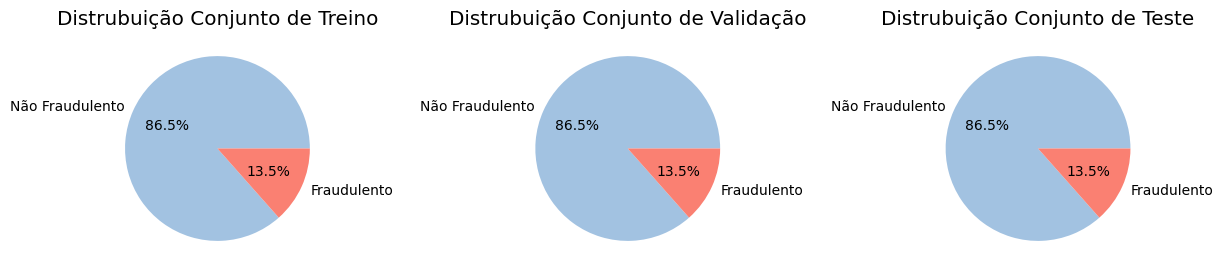

In [ ]:


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
labels= ['Não Fraudulento', 'Fraudulento']

x, y = np.unique(y_train, return_counts=True)
ax1.pie(y, labels=labels, autopct='%.1f%%', colors=['#A2C2E1', 'salmon'])
ax1.set_title('Distrubuição Conjunto de Treino')

x, y = np.unique(y_val, return_counts=True)
ax2.pie(y, labels=labels, autopct='%.1f%%', colors=['#A2C2E1', 'salmon'])
ax2.set_title('Distrubuição Conjunto de Validação')

x, y = np.unique(y_test, return_counts=True)
ax3.pie(y, labels=labels, autopct='%.1f%%', colors=['#A2C2E1', 'salmon'])
ax3.set_title('Distrubuição Conjunto de Teste')

plt.show()

Agora vamos ajustar alguns parâmetros para utilização da validação cruzada. Como já explicado, vamos usar F1-Score e Recall como métricas principais.

In [ ]:
# Parâmetros e partições da validação cruzada
scoring = 'recall'
scoring1 = 'f1'
num_particoes = 10

kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=1808) # validação cruzada com estratificação


##6 | Modelagem e Inferência
------------

Retomando nosso problema principal: classificar uma transação em fraudulenta (1) e não fraudulenta (0). Para esse tipo de problema, vamos testar alguns modelos e avaliar qual é o melhor considerando a métrica **recall** e **f1-score**.

Além disso, através do processo de Feature Selection definimos 4 variáveis explicativas:

    ['TX_AMOUNT','HOUR','DAY_OF_WEEK','MONTH']



### 6.1 Modelos

Primeiramente vamos testar alguns modelos fora do pipeline para

In [ ]:
np.random.seed(1808) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=700)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 50
max_features = 2

In [ ]:
#bases = []
#model1 = LogisticRegression(max_iter=1000)
#bases.append(('logistic', model1))
#model2 = DecisionTreeClassifier()
#bases.append(('cart', model2))
#model3 = SVC()
#bases.append(('svm', model3))

In [ ]:
# Criando os ensembles e adicionando-os na lista de modelos
#models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features, max_samples=0.5, n_jobs=-1, bootstrap=True))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features, max_samples=0.5, n_jobs=-1, bootstrap=True))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
#models.append(('Voting', VotingClassifier(bases)))

Avaliação dos modelos considerando **RECALL** e **F1**:

In [ ]:
# Lista para armazenar os resultados
results = {'recall': [], 'f1': []}
names = []

# Avaliação dos modelos
for name, model in models:
    # Calculando as métricas separadamente para maior clareza
    recall_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    f1_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')

    # Adicionando os resultados
    results['recall'].append(recall_scores.mean())
    results['f1'].append(f1_scores.mean())
    names.append(name)

    # Exibindo as médias
    print(f"{name}: Recall: {results['recall'][-1]:.4f}, F1-score: {results['f1'][-1]:.4f}")

LR: Recall: 0.9560, F1-score: 0.9775
KNN: Recall: 0.9652, F1-score: 0.9822
CART: Recall: 0.9657, F1-score: 0.9644
NB: Recall: 0.5245, F1-score: 0.6878
Ada: Recall: 0.9655, F1-score: 0.9824
GB: Recall: 0.9655, F1-score: 0.9824


Pelo análise acima, mesmo limitando o número de features e de trees novamos que o treinamento estava demorando mais tempo do que gostaríamos. Com isso, vamos retirar Bagging e Voting da nossa lista de ensebles a serem avaliados. Para Random Forest e Extra Trees vamos limitar o tamanho da amostra a ser analisada, considerando o tempo de treinamento. Além disso, ainda para esses dois modelos, vamos utilizar `n_jobs=-1` para considerar múltiplos núcleos do processador.



Podemos notar que NB não está funcionando para o nosso problema, portanto é um modelo que será retirado da Pipeline a seguir (considerando que temos recursos de tempo limitados para rodar os testes do dataset de treinamento).

###6.2 Pipeline

Agora vamos montar uma pipeline com os modelos que fazem sentido considerando as observações já feita na seção anterior. Nessa parte do problema, vamos considerar a possibilidade de padronização e normalização dos dados, o que faz sentido dado que nossos atributos tem escalas muito diferentes.

In [ ]:
np.random.seed(1808)

pipelines = []
results = {'Recall': [], 'F1-score': []}
names = []

#criando elementos da pipeline

#algoritmos utilizados
reg_log = ('LR', LogisticRegression(max_iter=700))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
#naive_bayes = ('NB', GaussianNB())
#svm = ('SVM', SVC()) retiramos por demora no treinamento
#bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees)) retiramos por demora no treinamento
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features, max_samples=0.5, n_jobs=-1, bootstrap=True))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features, max_samples=0.5, n_jobs=-1, bootstrap=True))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
#voting = ('Voting', VotingClassifier(bases))retiramos por demora no treinamento

#transformações
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler()) # Fix: Instantiate MinMaxScaler

Ao tentar rodar a pipeline abaixo pela primeira vez, notei que o tempo de execução estava sendo de quase 3 horas. Considerando as limitações de tempo para esse projeto (considerando que tenho que rodar várias vezes e entender alguns padrôes e mudanças), decidi retirar (estão nos comentários) os modelos de ensembles que são igualmente bons ou com desempenho muito pior. Desta forma, consegui otimizar o tempo de execução.  Segue abaixo o print da primeira vez que foi executado: 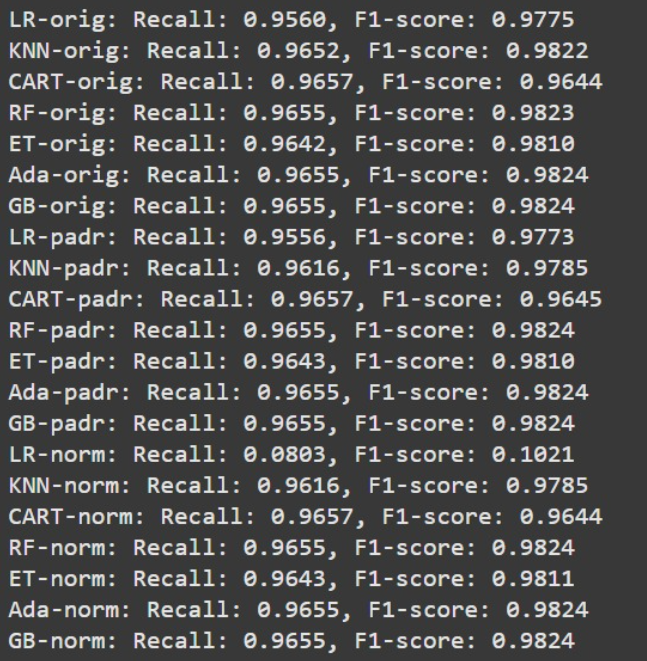

Além disso, vamos manter apenas os modelos originais e padronizados de cada opção escolhida, pois isso já nos dá uma ideia da performance do modelo para dados com diferentes escalas. Vamos focar nos modelos de ensemble para esse problema (e manter outros modelos mais simples, a título de comparação). Por exemplo, LR é um modelo linear fácil de treinar e interpretar, então caso ele funcione, pode ser uma opção mais rápida para possível treinamento.

Para os modelos abaixo, vamos deixar em comentário mais alguns para ser mais fácil a execução e avaliação. Porém os resultados da rodagem 01 estão apresentados abaixo.



In [ ]:
# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
#pipelines.append(('KNN-orig', Pipeline([knn])))
#pipelines.append(('CART-orig', Pipeline([cart])))
#pipelines.append(('NB-orig', Pipeline([naive_bayes])))
#pipelines.append(('SVM-orig', Pipeline([svm])))
#pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
#pipelines.append(('ET-orig', Pipeline([extra_trees])))
#pipelines.append(('Ada-orig', Pipeline([adaboost])))
#pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
#pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
#pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
#pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
#pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
#pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
#pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
#pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
#pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
#pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
#pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
#pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
#pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
#pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
#pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
#pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
#pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
#pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
#pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
#pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
#pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
#pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

In [ ]:
# Initializar o dicionário
results = {'recall': [], 'f1': []}
names = []

# Executando os pipelines
for name, model in pipelines:

    recall_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    f1_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')


    results['recall'].append(recall_results.mean())
    results['f1'].append(f1_results.mean())

    # Armazenando o nome do modelo
    names.append(name)


    msg = f'{name}: Recall: {results["recall"][-1]:.4f}, F1-score: {results["f1"][-1]:.4f}'
    print(msg)



LR-orig: Recall: 0.9560, F1-score: 0.9775
RF-orig: Recall: 0.9655, F1-score: 0.9824
LR-padr: Recall: 0.9556, F1-score: 0.9773
RF-padr: Recall: 0.9655, F1-score: 0.9824


Resultados da execução 1 (2 horas de execução):

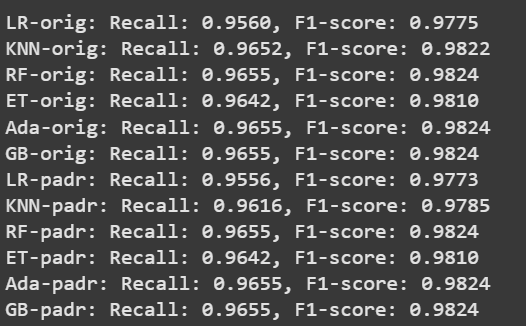

In [ ]:
# Salvar os resultados
joblib.dump(results, 'pipeline_results.pkl')
joblib.dump(names, 'pipeline_names.pkl')

['pipeline_names.pkl']

In [ ]:
# Carregar os resultados
results = joblib.load('pipeline_results.pkl')
names = joblib.load('pipeline_names.pkl')

O gráfico a seguir está em comentário por conta de tempo de execução. Porém, o gráfico original está postado abaixo (considerando a minha primeira execução):

In [ ]:
# Boxplot of model comparison (OUTSIDE the loop)
#fig, axes = plt.subplots(1, 2, figsize=(25, 6)) # Create two subplots

#fig.suptitle('Comparação dos Modelos - Dataset original, padronizado e normalizado')

# Create a list of lists for boxplot input, where each inner list is a model's recall results
#recall_boxplot_data = [[recall_results.mean() for recall_results in cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')] for name, model in pipelines]

# Boxplot for Recall
#axes[0].boxplot(recall_boxplot_data)
#axes[0].set_xticklabels(names, rotation=90)
#axes[0].set_title('Recall')

# Create a list of lists for boxplot input, where each inner list is a model's f1 results
#f1_boxplot_data = [[f1_results.mean() for f1_results in cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')] for name, model in pipelines]

# Boxplot for F1-score
#axes[1].boxplot(f1_boxplot_data)
#axes[1].set_xticklabels(names, rotation=90)
#axes[1].set_title('F1-score')

# Salvar o gráfico como imagem
#plt.savefig('boxplot_comparacao_modelos.png', dpi=300, bbox_inches='tight')

#plt.tight_layout() # Adjust layout to prevent overlapping
#plt.show()

In [ ]:
# Carregar e exibir o gráfico salvo
Image(filename='boxplot_comparacao_modelos.png')

Como o código anterior demora um tempo considerável para executar, segue o resultado:
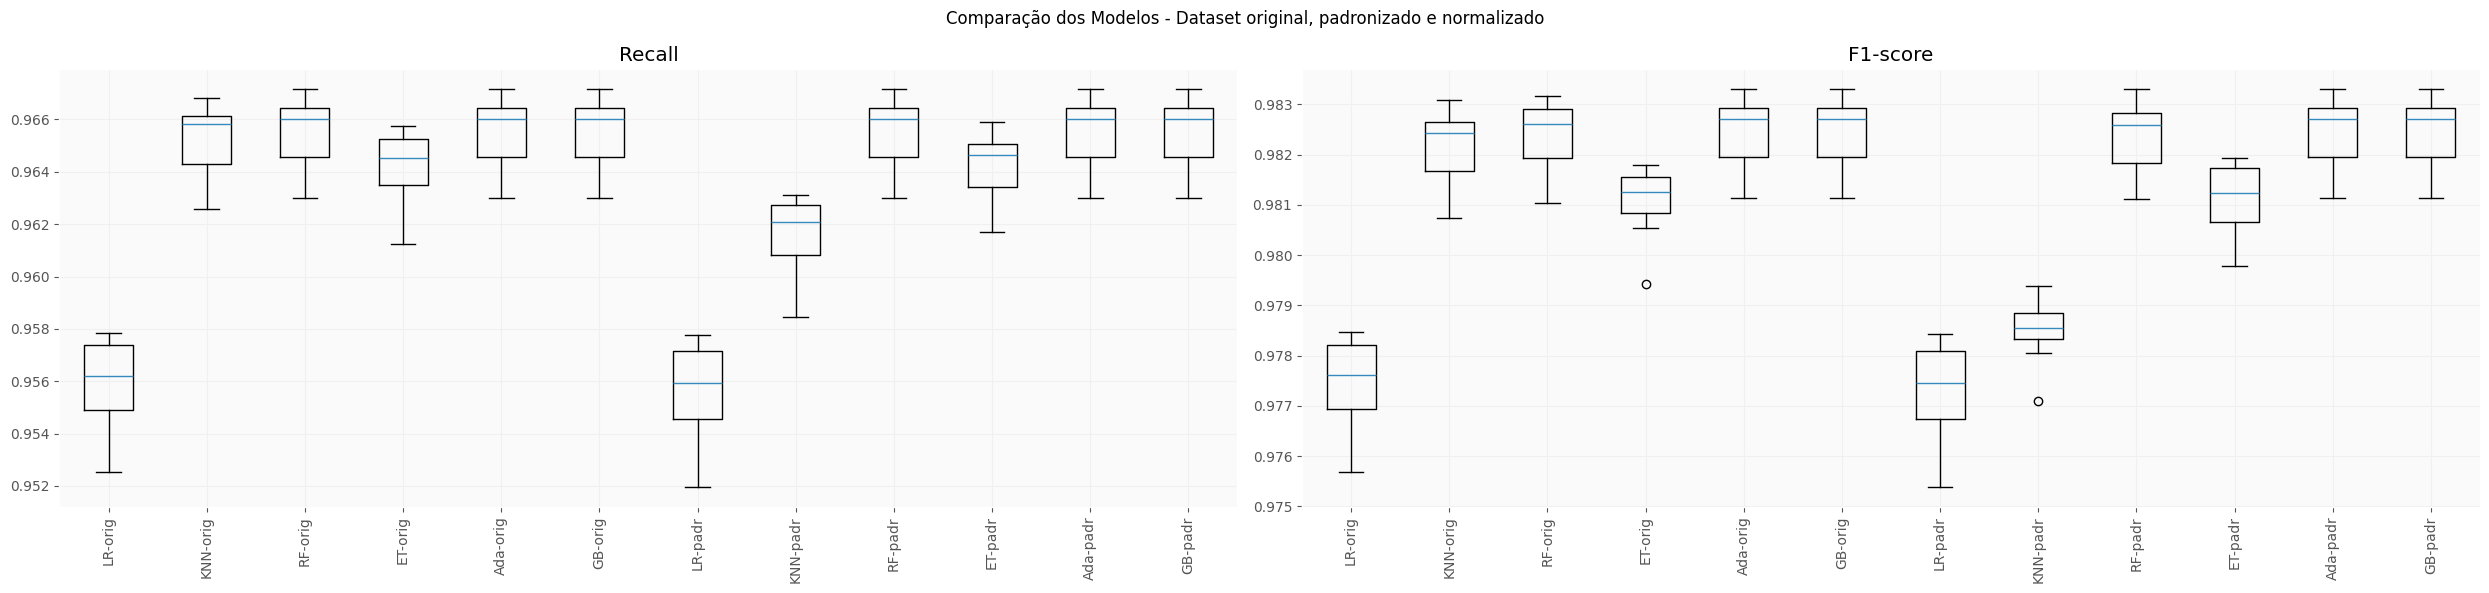

Considerando a análise anterior, podemos notar que os modelos são semelhantes em termos de performance das duas métricas que consideramos importantes. Temos alguns pontos importante ao analisar os modelos e tomar uma decisão:

*   `KNN-padr`: esse é um modelo que ajuda na interpretabilidade do problema, tem um f1-score e recall bons, porém como nosso dataset é muito grande o treinamento poderia demorar muito tempo (e pensando num modelo mais adaptativo a concept drifts, por exemplo, seria difícil o processo de treinamento de tempos em tempos, que é o que a gente precisaria nesse caso), esse não é o melhor modelo. Além disso, a possibilidade de overfitting é algo que queremos desviar, principalmente com um dataset dessa magnetude. O modelo é sensível à mudanças de escala, então os dados teriam que ser padronizados caso a escolha fosse essa.

*   `RF-padr`: esse modelo é mais eficiente e escalável, considerando o volume de dados. Além disso, ele lida bem que as 4 features que gostaríamos de utilizar. Ele captura interações não lineares e lida bem com dados com ruído ou desbalanceamento. Portanto usaremos esse ensemble (até para evitar overfitting, já que a combinação de vários modelos ajuda a reduzir o risco de overfitting).



##7 | Otimização de Hiperparâmetros
------------

Como justificado anteriormente, optamos pelo ensemble **Random Forest**, que é uma técnica de Bagging (que combina vários modelos de aprendizagem, em geral árvores de decisão).  

O funcionamento do **Random Forest** é o seguinte: ele cria múltiplas subamostras do conjunto de dados original (no caso, de treinamento) com reposição. Ou seja, pra cada árvore construída ele seleciona aleatoriamente exemplos do conjunto de treino. Depois de construir várias árvores, a previsão final do Random Forest é feita por votação A principal vantagem do Random Forest é que, devido ao bagging, ele consegue reduzir o overfitting. Isso acontece porque ele usa amostras diferentes e subconjuntos diferentes de features, o que reduz a chance de uma única árvore capturar ruídos ou padrões irrelevantes dos dados.

Dado que definimos a escolha do modelo, vamos entender como otimizar os parâmetros para ter o melhor resultado possível.



###7.1 Hiperparâmetros ajustáveis

No caso de Random Forest (RF), os principais parâmetros que podem ser ajustados são:

*   `n_estimators:`  número de árvores. Aumentar o número de árvores tende a melhorar o modelo, porém aumenta também o tempo de treinamento. Vamos utilizar alguns valores e entender como afeta a parformance.

*   `max_depth:`  profundidade máxima das árvores. Árvores muito profundas tem uma chance maior de se adaptar demais ao conjunto de treinamento. Porém árvores muito rasas podem perdem padrões importantes.

*   `min_samples_split:`  número mínimo de amostrar para dividir um nó.

*   `max_features:`  número máximo de features a serem consideradas em cada divisão de nó.

*   `bootstrap:`  define se será usada amostragem com reposição para criar as árvores.

Vamos testar algumas configurações usando RandomizedSearchCV em vez de GridSearchCV, pois nosso conjunto de dados é muito grande. Além disso, vamos optar por diminuir ainda mais o conjunto de treino (considerando o tempo que a primeira parte de modelagem levou para analisar os dados de treino atuais).

In [ ]:
#atualização de tamanho do conjunto de treino apenas para essa etapa:
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=1809, stratify=y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=1808))
])

# 3. Definir o grid de hiperparâmetros que deseja otimizar
param_dist = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20],
    'rf__min_samples_split': [2, 10],
    'rf__min_samples_leaf': [1, 5],
    'rf__max_features': ['auto', 'log2'],
    'rf__bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='f1', random_state=1808, verbose=2)

# 4. Ajustar o modelo com o RandomizedSearchCV
random_search.fit(X_train_sampled, y_train_sampled)

# 5. Melhor combinação de parâmetros encontrada
print("Melhores parâmetros:", random_search.best_params_)

# 6. Avaliar o modelo com o melhor conjunto de hiperparâmetros
y_pred = random_search.predict(X_val)

# 7. Exibir as métricas de desempenho
print("Classification Report:\n", classification_report(y_val, y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END rf__bootstrap=True, rf__max_depth=20, rf__max_features=log2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100; total time= 1.2min
[CV] END rf__bootstrap=True, rf__max_depth=20, rf__max_features=log2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100; total time= 1.2min
[CV] END rf__bootstrap=True, rf__max_depth=20, rf__max_features=log2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100; total time= 1.2min
[CV] END rf__bootstrap=False, rf__max_depth=20, rf__max_features=auto, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200; total time=   0.0s
[CV] END rf__bootstrap=False, rf__max_depth=20, rf__max_features=auto, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200; total time=   0.0s
[CV] END rf__bootstrap=False, rf__max_depth=20, rf__max_features=auto, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=

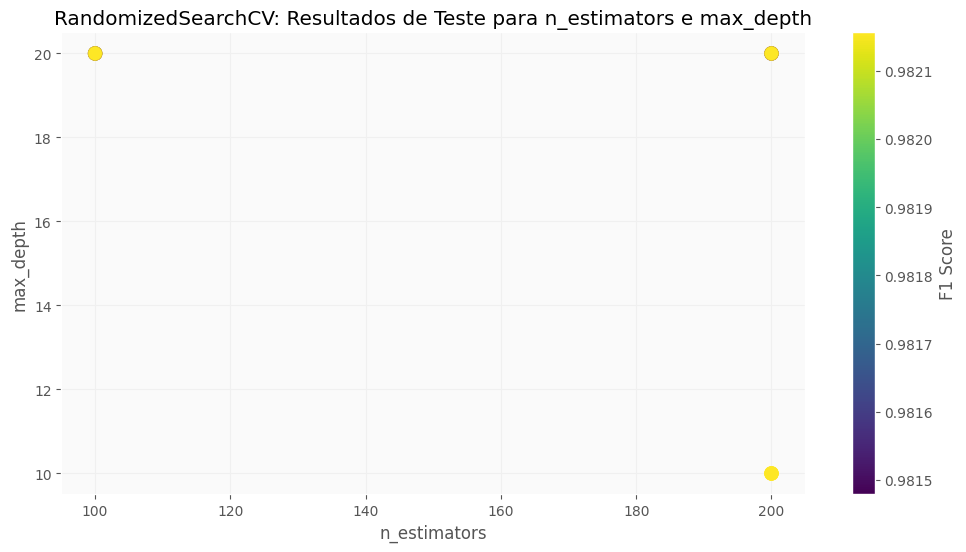

In [ ]:
# Extraindo os resultados do RandomizedSearchCV
results = pd.DataFrame(random_search.cv_results_)

# Plotando a evolução das pontuações para diferentes combinações de parâmetros
plt.figure(figsize=(12, 6))
plt.scatter(results['param_rf__n_estimators'], results['param_rf__max_depth'],
            c=results['mean_test_score'], cmap='viridis', s=100)

plt.colorbar(label='F1 Score')
plt.title('RandomizedSearchCV: Resultados de Teste para n_estimators e max_depth')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')

# Salvando o gráfico como imagem
plt.savefig('randomized_search_results.png', dpi=300, bbox_inches='tight')

# Exibindo o gráfico
plt.show()

Gráfico:
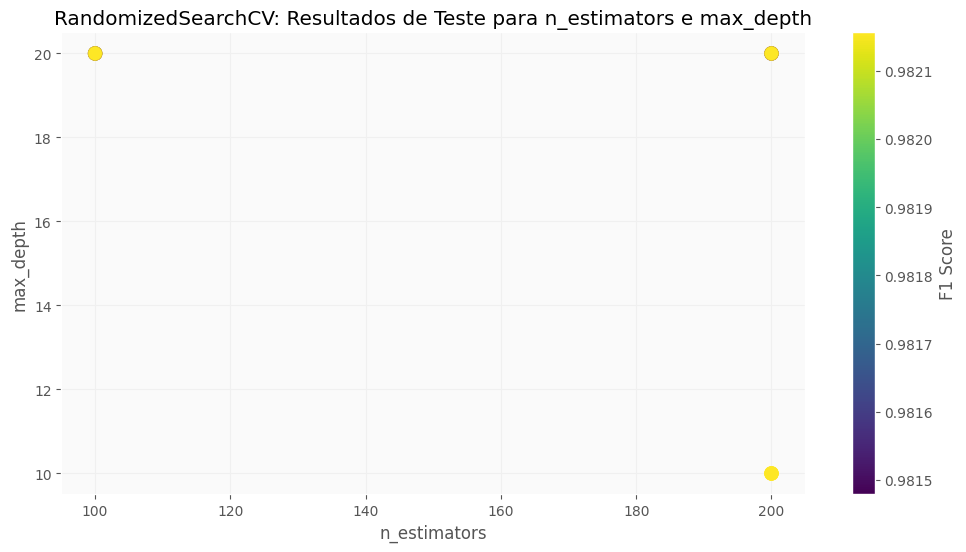

In [ ]:
# Carregar e exibir o gráfico salvo
Image(filename='randomized_search_results.png')

# Salvar o melhor modelo
joblib.dump(random_search.best_estimator_, 'best_random_search_model.pkl')

['best_random_search_model.pkl']

Pela avaliação acima, das 30 combinações testadas considerando a métrica **f1-score** os melhores parâmetros para **Random Forest** padronizada são:

- rf__n_estimators': 100
- rf__min_samples_split': 2
- rf__min_samples_leaf': 5
- rf__max_features': log2
- rf__max_depth': 20
- rf__bootstrap': True

##8 | Treinamento do Modelo
------------

Considerando nosso modelo definido e nossos parâmetros já pré-definidos, vamos para etapa de treinamento (conjunto de treino) e validação (conjunto de validação):


In [ ]:
# Padronizando os dados
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Definindo o modelo de Random Forest com os melhores parâmetros
rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=5,
    max_features='log2',
    max_depth=20,
    bootstrap=True,
    random_state=1808
)

# Treinando o modelo
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=5,
                       random_state=1808)

Agora vamos para etapa de validação no `X_val` para entender se o modelo está overfittando ou se está aprendendo, de fato. Antes disso, vamos deixar o modelo salvo para que a gentenão precise treiná-lo novamente:

In [ ]:

# Salvando o modelo
joblib.dump(rf, 'modelo_random_forest.pkl')

['modelo_random_forest.pkl']

In [ ]:
y_pred_val = rf.predict(X_val_scaled)

# Calculando o f1-score
f1_val = f1_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)

print(f'F1-score no conjunto de validação: {f1_val:.4f}')
print(f'Recall no conjunto de validação: {recall_val:.4f}')


F1-score no conjunto de validação: 0.9818
Recall no conjunto de validação: 0.9642


[[303636      0]
 [  1690  45504]]


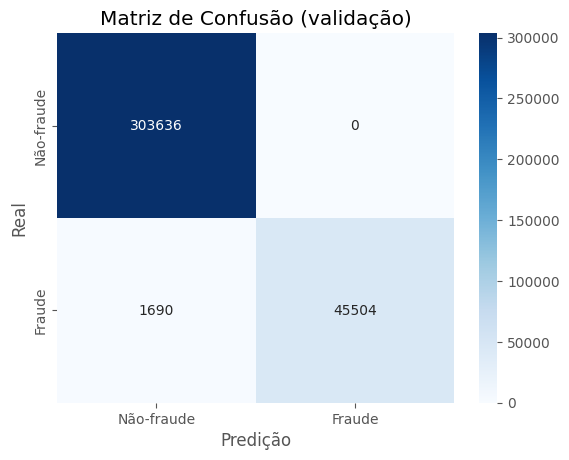

In [ ]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_val, y_pred_val)
print(cm)

# Visualizando a matriz de confusão com um heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não-fraude', 'Fraude'], yticklabels=['Não-fraude', 'Fraude'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão (validação)')
plt.show()

- F1-score de 0,9818: O F1-score é a média harmônica entre precisão e recall. Esse valor sugere que o modelo está sendo eficaz em prever corretamente tanto as classes positivas quanto negativas, sem gerar muitos falsos positivos ou falsos negativos.

- Recall de 0,9642: O recall mede a capacidade do modelo de identificar corretamente todas as instâncias positivas (ou seja, identificar fraude). Nesse caso, um recall de 96,42% indica que o modelo está conseguindo capturar a maior parte dos exemplos positivos (as instâncias de interesse).

Com o resultado positivo do modelo já treinado, agora vamos fazer um **re-treino** com o conjunto de treino + conjunto de validação e entender os resultados agora no conjunto de teste:


In [ ]:
# Concatenando o conjunto de treino e validação
X_combined = np.concatenate((X_train, X_val), axis=0)
y_combined = np.concatenate((y_train, y_val), axis=0)

# Padronizando os dados combinados
X_combined_scaled = scaler.fit_transform(X_combined)  # Escalando o conjunto combinado

# Definindo o modelo de Random Forest com os melhores parâmetros
rf2 = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=5,
    max_features='log2',
    max_depth=20,
    bootstrap=True,
    random_state=1808
)

# Treinando o modelo com o conjunto combinado
rf2.fit(X_combined_scaled, y_combined)


RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=5,
                       random_state=1808)

In [ ]:
# Salvando o modelo definitivo
joblib.dump(rf2, 'modelo_random_forest2.pkl')

['modelo_random_forest2.pkl']

Agora com um modelo já treinado, vamos entender a estimativa do f1-score e recall no conjunto de teste (dados não vistos):

In [ ]:
# Estimativa da f1 e recall no conjunto de teste

rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = rf2.predict(rescaledTestX)
print(f1_score(y_test, predictions))
print(recall_score(y_test, predictions))

0.9823615663274108
0.9653345764292071


[[303636      0]
 [  1636  45558]]


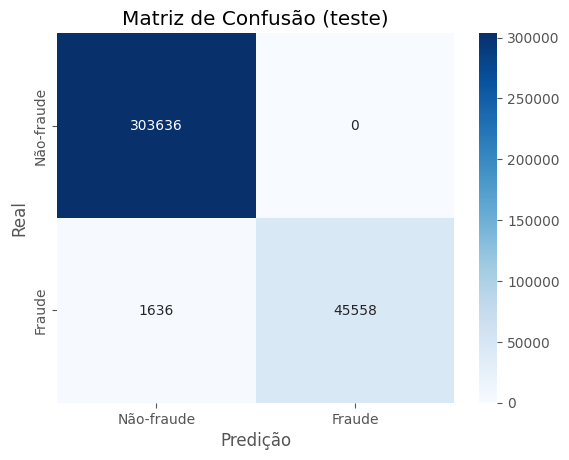

In [ ]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, predictions)
print(cm)

# Visualizando a matriz de confusão com um heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não-fraude', 'Fraude'], yticklabels=['Não-fraude', 'Fraude'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão (teste)')
plt.show()


Falsos positivos são inexistentes, o que é ótimo, pois isso significa que não há transações legítimas sendo classificadas erroneamente como fraudulentas, o que poderia significar um mal estar para o cliente.

Falsos negativos são relativamente baixos, mas ainda assim o modelo poderia melhorar um pouco nesse aspecto para capturar mais fraudes. Dito isso, num ambiente com uma capacidade computacional maior poderíamos avaliar mais hiperparâmetros e modelos específicos para melhorar o desempenho nesse quesito.

##9 | Preparação do modelo para produção
------------

Por meio do conjunto de teste, verificamos que alcançamos f1-score de 98,23% e recall de 96,53%, em dados não vistos. Valores semelhantes à essas métricas no conjunto de teste são esperados quando esse modelo estiver executando em produção e fazendo predições para novos dados.

Vamos agora preparar o modelo para utilização em produção. Para isso, vamos treiná-lo com todo o dataset, e não apenas o conjunto de treino.

Nesse caso, vamos usar o **modelo tradicional de treinamento** (sem validação cruzada) pois em produção o modelo treinado através de validação cruzada não pode ser usado diretamente em produção, pois ele é validado com subconjuntos dos dados. Além do alto custo computacional e de tempo (para um conjunto de dados grande de dados).

In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
rf2.fit(rescaledX, y)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=5,
                       random_state=1808)

In [ ]:
# Salvando o modelo definitivo
joblib.dump(rf2, 'rf_definitivo_mvp2.pkl')

['rf_definitivo_mvp2.pkl']

##10 | Conclusão, Desafios e Próximos passos
------------


A maior lição tirada desse projeto foi entender o porquê dos datasets reais serem tão mais complicados de treinar. Nesse segundo projeto escolhi um dataset com muitas instâncias para tentar entender as dificuldades de treinamento nesse caso.

O dataset estava praticamente limpo e preparado para treinamento, precisamos apenas fazer alguns ajustes e desmontar a coluna de time para que fosse algo possível de ser processado. Nosso objetivo era criar um modelo que classificasse transações fraudulentas baseado em algumas informações da transações. Utilizamos o processo de **Feature Selection** para tentar identificar quais as variáveis ajudariam a explicar melhor a variável target. Utilizando um pouco de análise exploratória de dados tivemos uma ideia de quais seriam os melhores atributos, mas a etapa de  Feature Selection nos ajudou a entender um pouco mais o relacionamento entre as variáveis.

Inicialmente testamos alguns modelos fora de uma pipeline e considerando apenas os dados originais para ter ideia do tempo de treinamento, já que foi a primeira vez que trabalhava com um conjunto tão grande de instâncias. Após excluir alguns podemos por conta do tempo de treinamento, criamos uma pipeline com modelos que faziam sentido para o nosso problema e depois de testá-los concluímos que **Random Forest** seria ideal considerando o tempo de treinamento e as métricas escolhidas: f1-score e recall, visto que tínhamos classes muito desbalanceadas.

Depois que escolhemos o modelo, otimizamos os hiperparâmetros através de uma varredura apeatória de 30 combinações de parâmetros pré-escolhidos:

- rf__n_estimators: 100
- rf__min_samples_split: 2
- rf__min_samples_leaf: 5
- rf__max_features: log2
- rf__max_depth: 20
- rf__bootstrap: True

Com os parâmetros e modelo ideais definidos, usamos o conjunto de treino para treiná-lo e o conjunto de validação para ter uma ideia inicial da sua perfornance. Depois disso, juntamos validação e treino para um re-treino para que pudéssemos analisar a parformance no conjunto de teste. Por último, para que fosse aplicado em produção, treinamos o modelo definitivo com todo o conjunto (treino, teste e validação).

O maior desafio foi o tempo de procura do modelo através da pipeline. Tive que diminuir um pouco o conjunto de treino utilizado e excluir algumas possibilidades pois o processo estava durando mais de três horas (ou seja, a cada alteração eu tinha que esperar 3 horas para verificar os resultados).

Ao avaliar o modelo definitivo através da matriz de confusão concluímos que:

Falsos positivos são inexistentes, o que é ótimo, pois isso significa que não há transações legítimas sendo classificadas erroneamente como fraudulentas, o que poderia significar um mal estar para o cliente.

Falsos negativos são relativamente baixos, mas ainda assim o modelo poderia melhorar um pouco nesse aspecto para capturar mais fraudes. Dito isso, num ambiente com uma capacidade computacional maior poderíamos avaliar mais hiperparâmetros e modelos específicos para melhorar o desempenho nesse quesito.

Como próximos passos, a ideia é entender quais requisitos computacionais seriam possíveis de serem melhorados no cenário atual da empresa em questão para que tivéssemos tempo e recursos para procurar outros modelos e hiperparâmetros que pudessem nos ajudar a identificar uma maior quantidade de fraudes.





